In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [5]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('Do not show this message')
# print("No Warning Shown")

In [6]:
df_cal=pd.read_csv(r"C:\Users\Dell\housing_proj\calendar.csv")
df_listing=pd.read_csv(r"C:\Users\Dell\housing_proj\listings.csv")

In [7]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20210706215658,2021-07-08,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments my flat gives yo...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,...,4.85,4.53,4.52,NaN,f,3,3,0,0,1.63
1,13913,https://www.airbnb.com/rooms/13913,20210706215658,2021-07-08,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.89,4.63,4.74,NaN,f,2,1,1,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20210706215658,2021-07-08,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,t,1,1,0,0,0.81
3,17402,https://www.airbnb.com/rooms/17402,20210706215658,2021-07-08,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.66,4.85,4.59,NaN,f,15,15,0,0,0.36
4,17506,https://www.airbnb.com/rooms/17506,20210706215658,2021-07-08,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN


In [8]:
df_listing.shape

(73364, 74)

In [9]:
df_listing.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73364 entries, 0 to 73363
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            73364 non-null  int64  
 1   listing_url                                   73364 non-null  object 
 2   scrape_id                                     73364 non-null  int64  
 3   last_scraped                                  73364 non-null  object 
 4   name                                          73341 non-null  object 
 5   description                                   70175 non-null  object 
 6   neighborhood_overview                         43836 non-null  object 
 7   picture_url                                   73364 non-null  object 
 8   host_id                                       73364 non-null  int64  
 9   host_url                                      73364 non-null 

In [10]:
df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.336400e+04,7.336400e+04,7.336400e+04,72720.000000,72720.000000,0.0,73364.000000,73364.000000,73364.000000,0.0,...,49132.000000,49170.000000,49130.000000,49126.000000,0.0,73364.000000,73364.000000,73364.000000,73364.000000,50786.000000
mean,2.728494e+07,2.021071e+13,1.050959e+08,25.962445,25.962445,NaN,51.509863,-0.128646,3.002276,NaN,...,4.795592,4.811584,4.749280,4.634494,NaN,28.106128,23.294027,4.253571,0.036067,0.632481
std,1.440012e+07,0.000000e+00,1.114664e+08,134.969836,134.969836,NaN,0.047742,0.095956,1.916437,NaN,...,0.469975,0.461378,0.429157,0.526667,NaN,111.625202,106.169172,21.712217,0.487408,1.165870
min,1.155100e+04,2.021071e+13,2.010000e+03,0.000000,0.000000,NaN,51.296850,-0.496160,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.575397e+07,2.021071e+13,1.757784e+07,1.000000,1.000000,NaN,51.484330,-0.188410,2.000000,NaN,...,4.790000,4.810000,4.670000,4.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.090000
50%,2.724552e+07,2.021071e+13,5.394886e+07,1.000000,1.000000,NaN,51.513990,-0.126230,2.000000,NaN,...,4.960000,5.000000,4.880000,4.770000,NaN,1.000000,1.000000,1.000000,0.000000,0.290000
75%,3.996368e+07,2.021071e+13,1.679681e+08,3.000000,3.000000,NaN,51.539470,-0.069657,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,4.000000,2.000000,1.000000,0.000000,0.790000
max,5.086939e+07,2.021071e+13,4.110563e+08,1927.000000,1927.000000,NaN,51.679830,0.288570,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,861.000000,860.000000,242.000000,18.000000,67.000000


In [11]:
print("Columns with missing values: \n ",df_listing.columns[df_listing.isnull().sum(axis=0)>0].values)

Columns with missing values: 
  ['name' 'description' 'neighborhood_overview' 'host_name' 'host_since'
 'host_location' 'host_about' 'host_response_time' 'host_response_rate'
 'host_acceptance_rate' 'host_is_superhost' 'host_thumbnail_url'
 'host_picture_url' 'host_neighbourhood' 'host_listings_count'
 'host_total_listings_count' 'host_has_profile_pic'
 'host_identity_verified' 'neighbourhood' 'neighbourhood_group_cleansed'
 'bathrooms' 'bathrooms_text' 'bedrooms' 'beds' 'minimum_minimum_nights'
 'maximum_minimum_nights' 'minimum_maximum_nights'
 'maximum_maximum_nights' 'minimum_nights_avg_ntm'
 'maximum_nights_avg_ntm' 'calendar_updated' 'first_review' 'last_review'
 'review_scores_rating' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value' 'license' 'reviews_per_month']


In [12]:
print("Columns with more than 75% missing values : \n ",df_listing.columns[df_listing.isnull().mean() > 0.75].values)

Columns with more than 75% missing values : 
  ['neighbourhood_group_cleansed' 'bathrooms' 'calendar_updated' 'license']


In [13]:
# now that we have taken a look into the listings data, let's look into the calendar data

df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11551,2021-07-08,f,$99.00,$99.00,2.0,1125.0
1,231452,2021-07-08,f,$75.00,$75.00,1.0,13.0
2,231452,2021-07-09,f,$75.00,$75.00,1.0,13.0
3,231452,2021-07-10,t,$75.00,$75.00,1.0,13.0
4,231452,2021-07-11,t,$75.00,$75.00,1.0,13.0


In [14]:
df_cal.shape

(26776497, 7)

In [15]:
df_cal['date'].dtype

dtype('O')

dtype('O') is basically pandas string though technically it is called pandas object data type. If we want to manipulate or use this date in any future analysis converting it to the datetime will be helpful so we will now do that and check from which date the data is given in the dataset.

In [16]:
pd.to_datetime(df_cal.date).sort_values(ascending=True)[0]

Timestamp('2021-07-08 00:00:00')

In [17]:
print("column names with missing values",df_cal.columns[df_cal.isnull().sum(axis=0)>0].values)

column names with missing values ['price' 'adjusted_price' 'minimum_nights' 'maximum_nights']


In [18]:
print("Column names with with more than 60% missing values",df_cal.columns[df_cal.isnull().mean()>0.60].values)

Column names with with more than 60% missing values []


# Let's visualize the listings data and check the data distribution and look for any visible outliers 

Text(0, 0.5, 'Frequency')

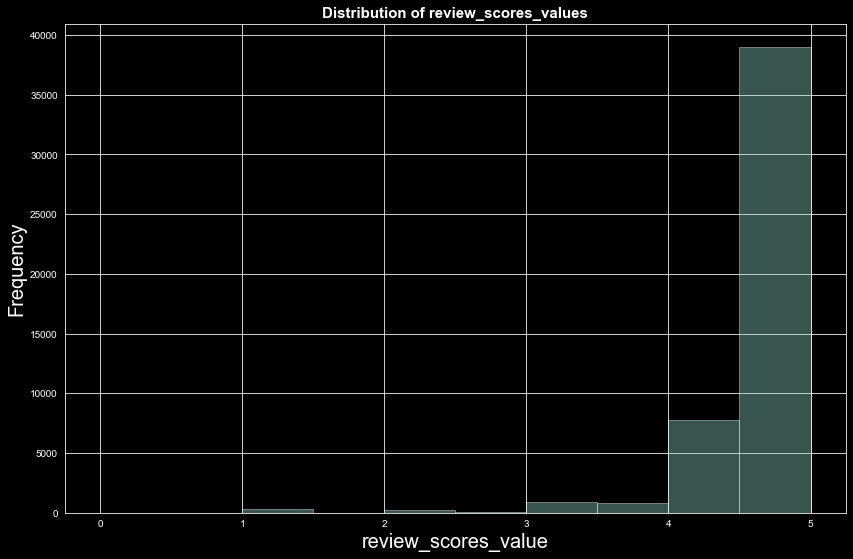

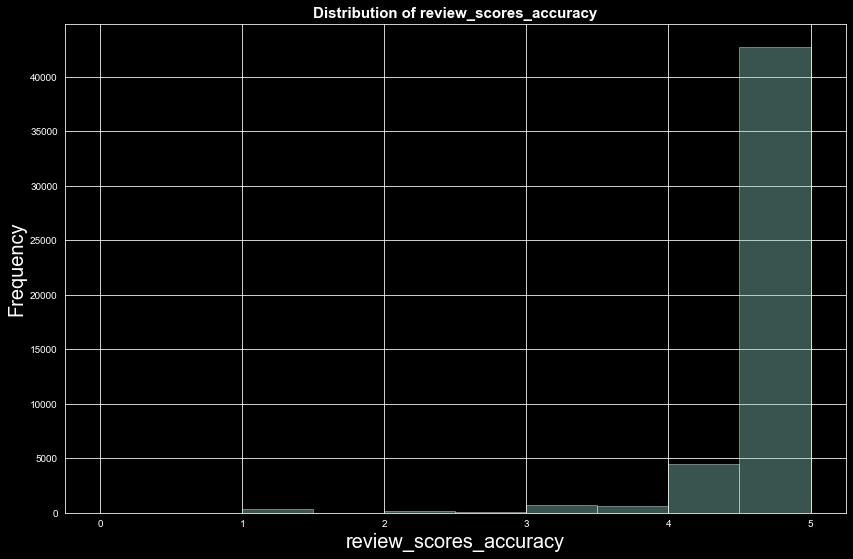

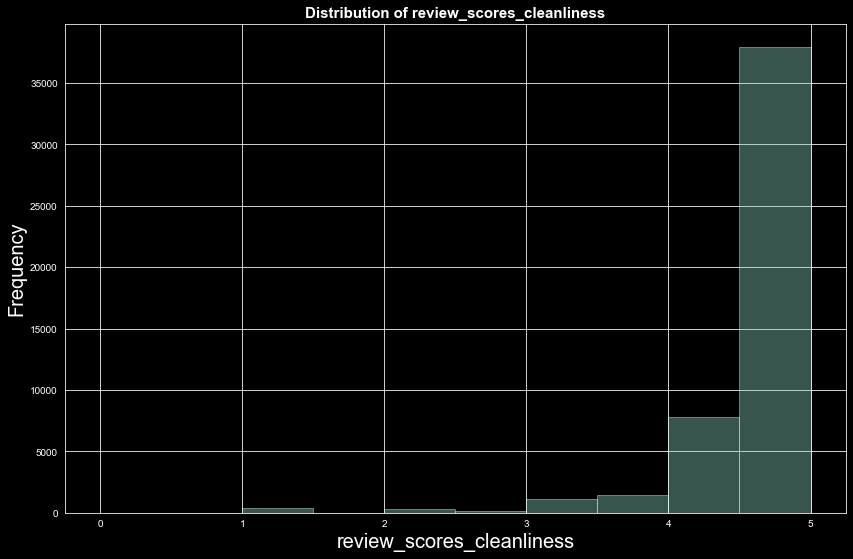

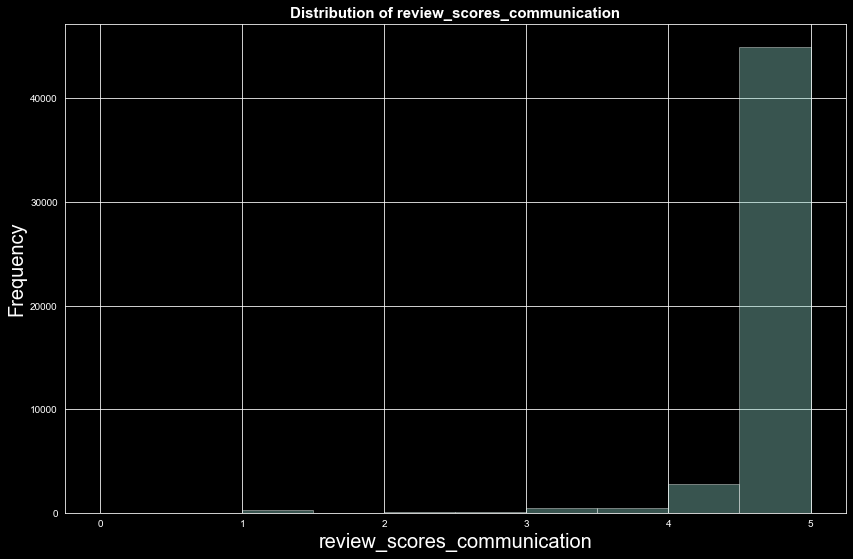

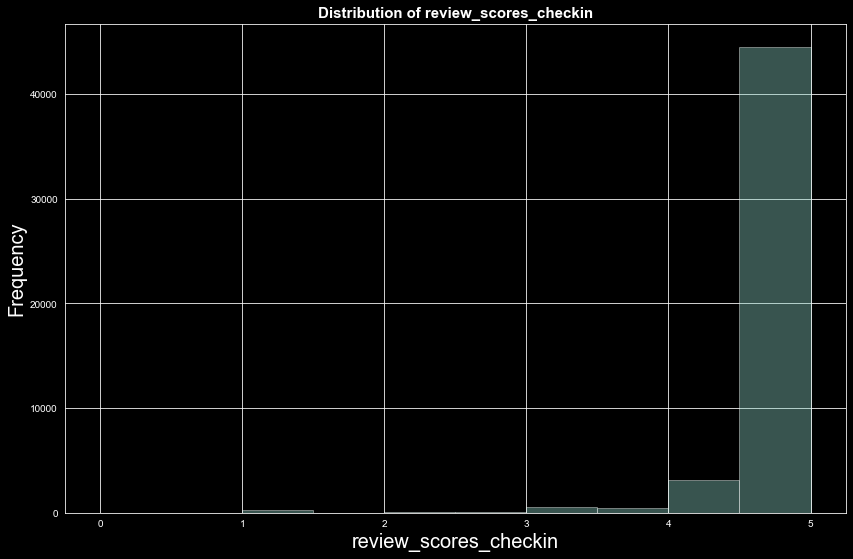

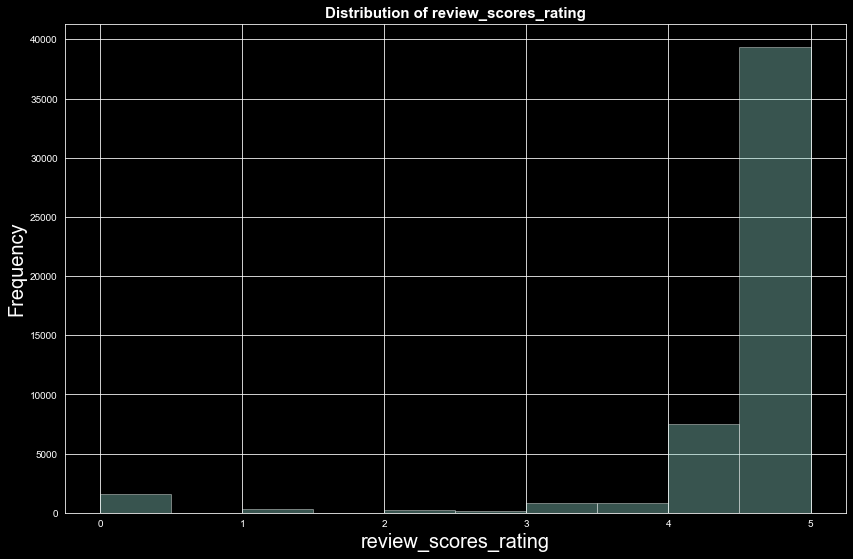

In [19]:

sns.set_style('darkgrid')
plt.style.use('dark_background')
plt.figure(figsize=(14,9))
sns.distplot(df_listing['review_scores_value'],kde=False,bins=10)
plt.title("Distribution of review_scores_values",weight = 'bold', fontsize = 15)
plt.xlabel("review_scores_value",fontsize=20)
plt.ylabel("Frequency",fontsize=20)

sns.set_style('darkgrid')
plt.style.use('dark_background')
plt.figure(figsize=(14,9))
sns.distplot(df_listing['review_scores_accuracy'],kde=False,bins=10)
plt.title("Distribution of review_scores_accuracy",weight = 'bold', fontsize = 15)
plt.xlabel("review_scores_accuracy",fontsize=20)
plt.ylabel("Frequency",fontsize=20)


sns.set_style('darkgrid')
plt.style.use('dark_background')
plt.figure(figsize=(14,9))
sns.distplot(df_listing['review_scores_cleanliness'],kde=False,bins=10)
plt.title("Distribution of review_scores_cleanliness",weight = 'bold', fontsize = 15)
plt.xlabel("review_scores_cleanliness",fontsize=20)
plt.ylabel("Frequency",fontsize=20)


sns.set_style('darkgrid')
plt.style.use('dark_background')
plt.figure(figsize=(14,9))
sns.distplot(df_listing['review_scores_communication'],kde=False,bins=10)
plt.title("Distribution of review_scores_communication",weight = 'bold', fontsize = 15)
plt.xlabel("review_scores_communication",fontsize=20)
plt.ylabel("Frequency",fontsize=20)


sns.set_style('darkgrid')
plt.style.use('dark_background')
plt.figure(figsize=(14,9))
sns.distplot(df_listing['review_scores_checkin'],kde=False,bins=10)
plt.title("Distribution of review_scores_checkin",weight = 'bold', fontsize = 15)
plt.xlabel("review_scores_checkin",fontsize=20)
plt.ylabel("Frequency",fontsize=20)


sns.set_style('darkgrid')
plt.style.use('dark_background')
plt.figure(figsize=(14,9))
sns.distplot(df_listing['review_scores_rating'],kde=False,bins=10)
plt.title("Distribution of review_scores_rating",weight = 'bold', fontsize = 15)
plt.xlabel("review_scores_rating",fontsize=20)
plt.ylabel("Frequency",fontsize=20)


From the visualizations we can see that the parameters are left skewed also called negative skewness meaning the mean of the distribution is leftwards.
For more information refer this article:
https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/

Now lets clean and format our datasets

As our listing dataset has close to 75 columns lets drop all the columns that won't help us in getting answers to our questions.

In [20]:
columns_drop=['id', 
            'scrape_id', 
            'last_scraped',
            'host_id',
            'host_name',
            'host_since',
            'host_location',
            'host_about',
            'host_verifications', 
            'host_neighbourhood',           
            'neighbourhood',
            'neighbourhood_group_cleansed',
            'license',
           'calendar_last_scraped',
           'calendar_updated',
           'first_review', 
            'last_review',
            'has_availability'
            ]


In [21]:
df_listing.drop(columns_drop,axis=1,inplace=True)

In [22]:
df_listing['host_response_rate']

0        100%
1        100%
2         NaN
3         70%
4         NaN
         ... 
73359     86%
73360    100%
73361    100%
73362    100%
73363     NaN
Name: host_response_rate, Length: 73364, dtype: object

In [23]:
df_listing.shape

(73364, 56)

In [24]:
cols_drop_2=['listing_url','host_url','neighborhood_overview','picture_url','host_thumbnail_url','host_picture_url','neighbourhood_cleansed']
df_listing.drop(cols_drop_2,axis=1,inplace=True)

In [25]:
df_listing2=pd.read_csv(r"C:\Users\Dell\housing_proj\listings.csv")

In [26]:
a=df_listing2.pop('neighbourhood_cleansed')

In [27]:
df_listing['host_response_rate']=(df_listing['host_response_rate'].str[:-1])
df_listing['host_acceptance_rate']=(df_listing['host_acceptance_rate'].str[:-1])

In [28]:
df_listing[['bathrooms','bedrooms','beds']].isnull().sum()

bathrooms    73364
bedrooms      4652
beds          1221
dtype: int64

In [29]:
#As nearly all of the records in the bathrooms are null it's better to drop the column
df_listing.drop('bathrooms',axis=1,inplace=True)

In [30]:
df_listing[['bedrooms','beds']].dtypes

bedrooms    float64
beds        float64
dtype: object

In [31]:
df_listing['bedrooms'].fillna(int(df_listing['bedrooms'].mean()), inplace=True)
df_listing['beds'].fillna(int(df_listing['beds'].mean()), inplace=True)

In [32]:
df_rooms = df_listing[["bedrooms", "beds"]]
for room in df_rooms:
    df_listing[room] = df_listing[room].astype(int)

In [33]:
df_listing[['bedrooms','beds']].dtypes

bedrooms    int32
beds        int32
dtype: object

In [34]:
df_listing['price'].dtypes

dtype('O')

In [35]:
df_listing['price'] = df_listing['price'].astype('str')
df_listing['price'] = df_listing['price'].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore')    
df_listing['price'] = df_listing['price'].astype('float')
df_listing['price'].fillna(df_listing['price'].median(), inplace = True)

In [36]:
df_listing['room_type']

0        Entire home/apt
1           Private room
2        Entire home/apt
3        Entire home/apt
4           Private room
              ...       
73359    Entire home/apt
73360    Entire home/apt
73361    Entire home/apt
73362    Entire home/apt
73363       Private room
Name: room_type, Length: 73364, dtype: object

In [37]:
df_listing.room_type.value_counts()

Entire home/apt    39985
Private room       32364
Shared room          555
Hotel room           460
Name: room_type, dtype: int64

In [38]:
df_listing.host_is_superhost.value_counts()

f    63118
t     9602
Name: host_is_superhost, dtype: int64

In [39]:
df_listings_num = df_listing.select_dtypes(include=['int64', 'int32', 'float64'])

In [40]:
df_listings_num[['host_is_superhost', 'room_type','property_type', 'host_response_time']] = df_listing[['host_is_superhost', 'room_type', 'property_type', 'host_response_time']]

In [41]:
categories = {"host_is_superhost": {"t": 1, "f": 2},
                "room_type": {"Entire home/apt": 1, "Private room": 2, "Shared room": 3}}
df_listings_num_copy = df_listings_num

df_listings_num_copy = df_listings_num_copy.replace(categories)

df_listings_dummies = pd.get_dummies(df_listings_num_copy)
df_listings_dummies.head(2)

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,property_type_Shared room in villa,property_type_Stanza privata in appartamento,property_type_Tent,property_type_Tiny house,property_type_Yurt,property_type_주택의 개인실,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,0.0,0.0,51.46095,-0.11758,4,1,3,99.0,2,1125,...,0,0,0,0,0,0,0,0,0,1
1,3.0,3.0,51.56861,-0.11270,2,1,0,65.0,1,29,...,0,0,0,0,0,0,0,0,1,0


In [42]:
df_listing[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                "review_scores_value", "reviews_per_month"]].isnull().sum()

review_scores_rating           22578
review_scores_accuracy         24190
review_scores_cleanliness      24179
review_scores_checkin          24232
review_scores_communication    24194
review_scores_location         24234
review_scores_value            24238
reviews_per_month              22578
dtype: int64

In [43]:
temp_df = df_listing[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                "review_scores_value", "reviews_per_month"]]

for feature in temp_df:
    df_listing[feature].fillna(df_listing[feature].mean(), inplace = True)

In [44]:
df_listing[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                "review_scores_value", "reviews_per_month"]].isnull().sum()

review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

In [45]:
df_listings_num=df_listings_num.join(a)

In [46]:
df_listing=df_listing.join(a)

# Calendar Dataset Data handling

In [47]:
df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11551,2021-07-08,f,$99.00,$99.00,2.0,1125.0
1,231452,2021-07-08,f,$75.00,$75.00,1.0,13.0
2,231452,2021-07-09,f,$75.00,$75.00,1.0,13.0
3,231452,2021-07-10,t,$75.00,$75.00,1.0,13.0
4,231452,2021-07-11,t,$75.00,$75.00,1.0,13.0


In [48]:
col_dro=['minimum_nights','maximum_nights']
df_cal.drop(col_dro,axis=1,inplace=True)

In [49]:
df_cal.head()

,listing_id,date,available,price,adjusted_price
0,11551,2021-07-08,f,$99.00,$99.00
1,231452,2021-07-08,f,$75.00,$75.00
2,231452,2021-07-09,f,$75.00,$75.00
3,231452,2021-07-10,t,$75.00,$75.00
4,231452,2021-07-11,t,$75.00,$75.00


In [50]:
#let's get the month of the listing from the given date and store it in new column
df_cal['month']=df_cal.date.apply(lambda val: val.split('-')[1])
df_cal['month']=df_cal['month'].replace({
    '01':'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
})



In [51]:
df_cal[['price','adjusted_price']].isnull().sum()

price             6058
adjusted_price    6058
dtype: int64

In [52]:
df_cal['price']=df_cal['price'].astype('str')
df_cal['price']=df_cal['price'].map(lambda x:x.replace("$","").replace(",",""),na_action='ignore')
df_cal['price']=df_cal['price'].astype('float')

In [53]:
df_cal['price'].fillna(df_cal['price'].median(),inplace=True)

In [54]:
df_cal['price'].isnull().sum()

0

In [55]:
df_cal['adjusted_price']=df_cal['adjusted_price'].astype('str')
df_cal['adjusted_price']=df_cal['adjusted_price'].map(lambda x:x.replace("$","").replace(",",""),na_action='ignore')
df_cal['adjusted_price']=df_cal['adjusted_price'].astype('float')
df_cal['adjusted_price'].fillna(df_cal['adjusted_price'].median(),inplace=True)

In [56]:
df_cal['month'].value_counts()

Jul    2274252
Oct    2274160
Mar    2274160
Jan    2274160
Dec    2274160
May    2274160
Aug    2274160
Jun    2200805
Apr    2200800
Sep    2200800
Nov    2200800
Feb    2054080
Name: month, dtype: int64

Now that we have a dataset which formatted according to our needs let's find answers to some relevant business questions and gain some valuable insights from our data

# Answering the Business Related Questions using Visualization approach.

 # Which are the neighbourhoods with highest number of listings

In [57]:
df_listings_num.head()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost,room_type,property_type,host_response_time,neighbourhood_cleansed
0,0.0,0.0,51.46095,-0.11758,4,1,3,99.0,2,1125,...,3,3,0,0,1.63,f,Entire home/apt,Entire apartment,within an hour,Lambeth
1,3.0,3.0,51.56861,-0.11270,2,1,0,65.0,1,29,...,2,1,1,0,0.17,f,Private room,Private room in apartment,within a few hours,Islington
2,1.0,1.0,51.48780,-0.16813,2,1,1,75.0,10,50,...,1,1,0,0,0.81,f,Entire home/apt,Entire apartment,NaN,Kensington and Chelsea
3,18.0,18.0,51.52195,-0.14094,6,3,3,307.0,4,365,...,15,15,0,0,0.36,f,Entire home/apt,Entire apartment,within a day,Westminster
4,3.0,3.0,51.47935,-0.19743,2,1,1,150.0,3,21,...,2,0,2,0,NaN,f,Private room,Private room in townhouse,NaN,Hammersmith and Fulham


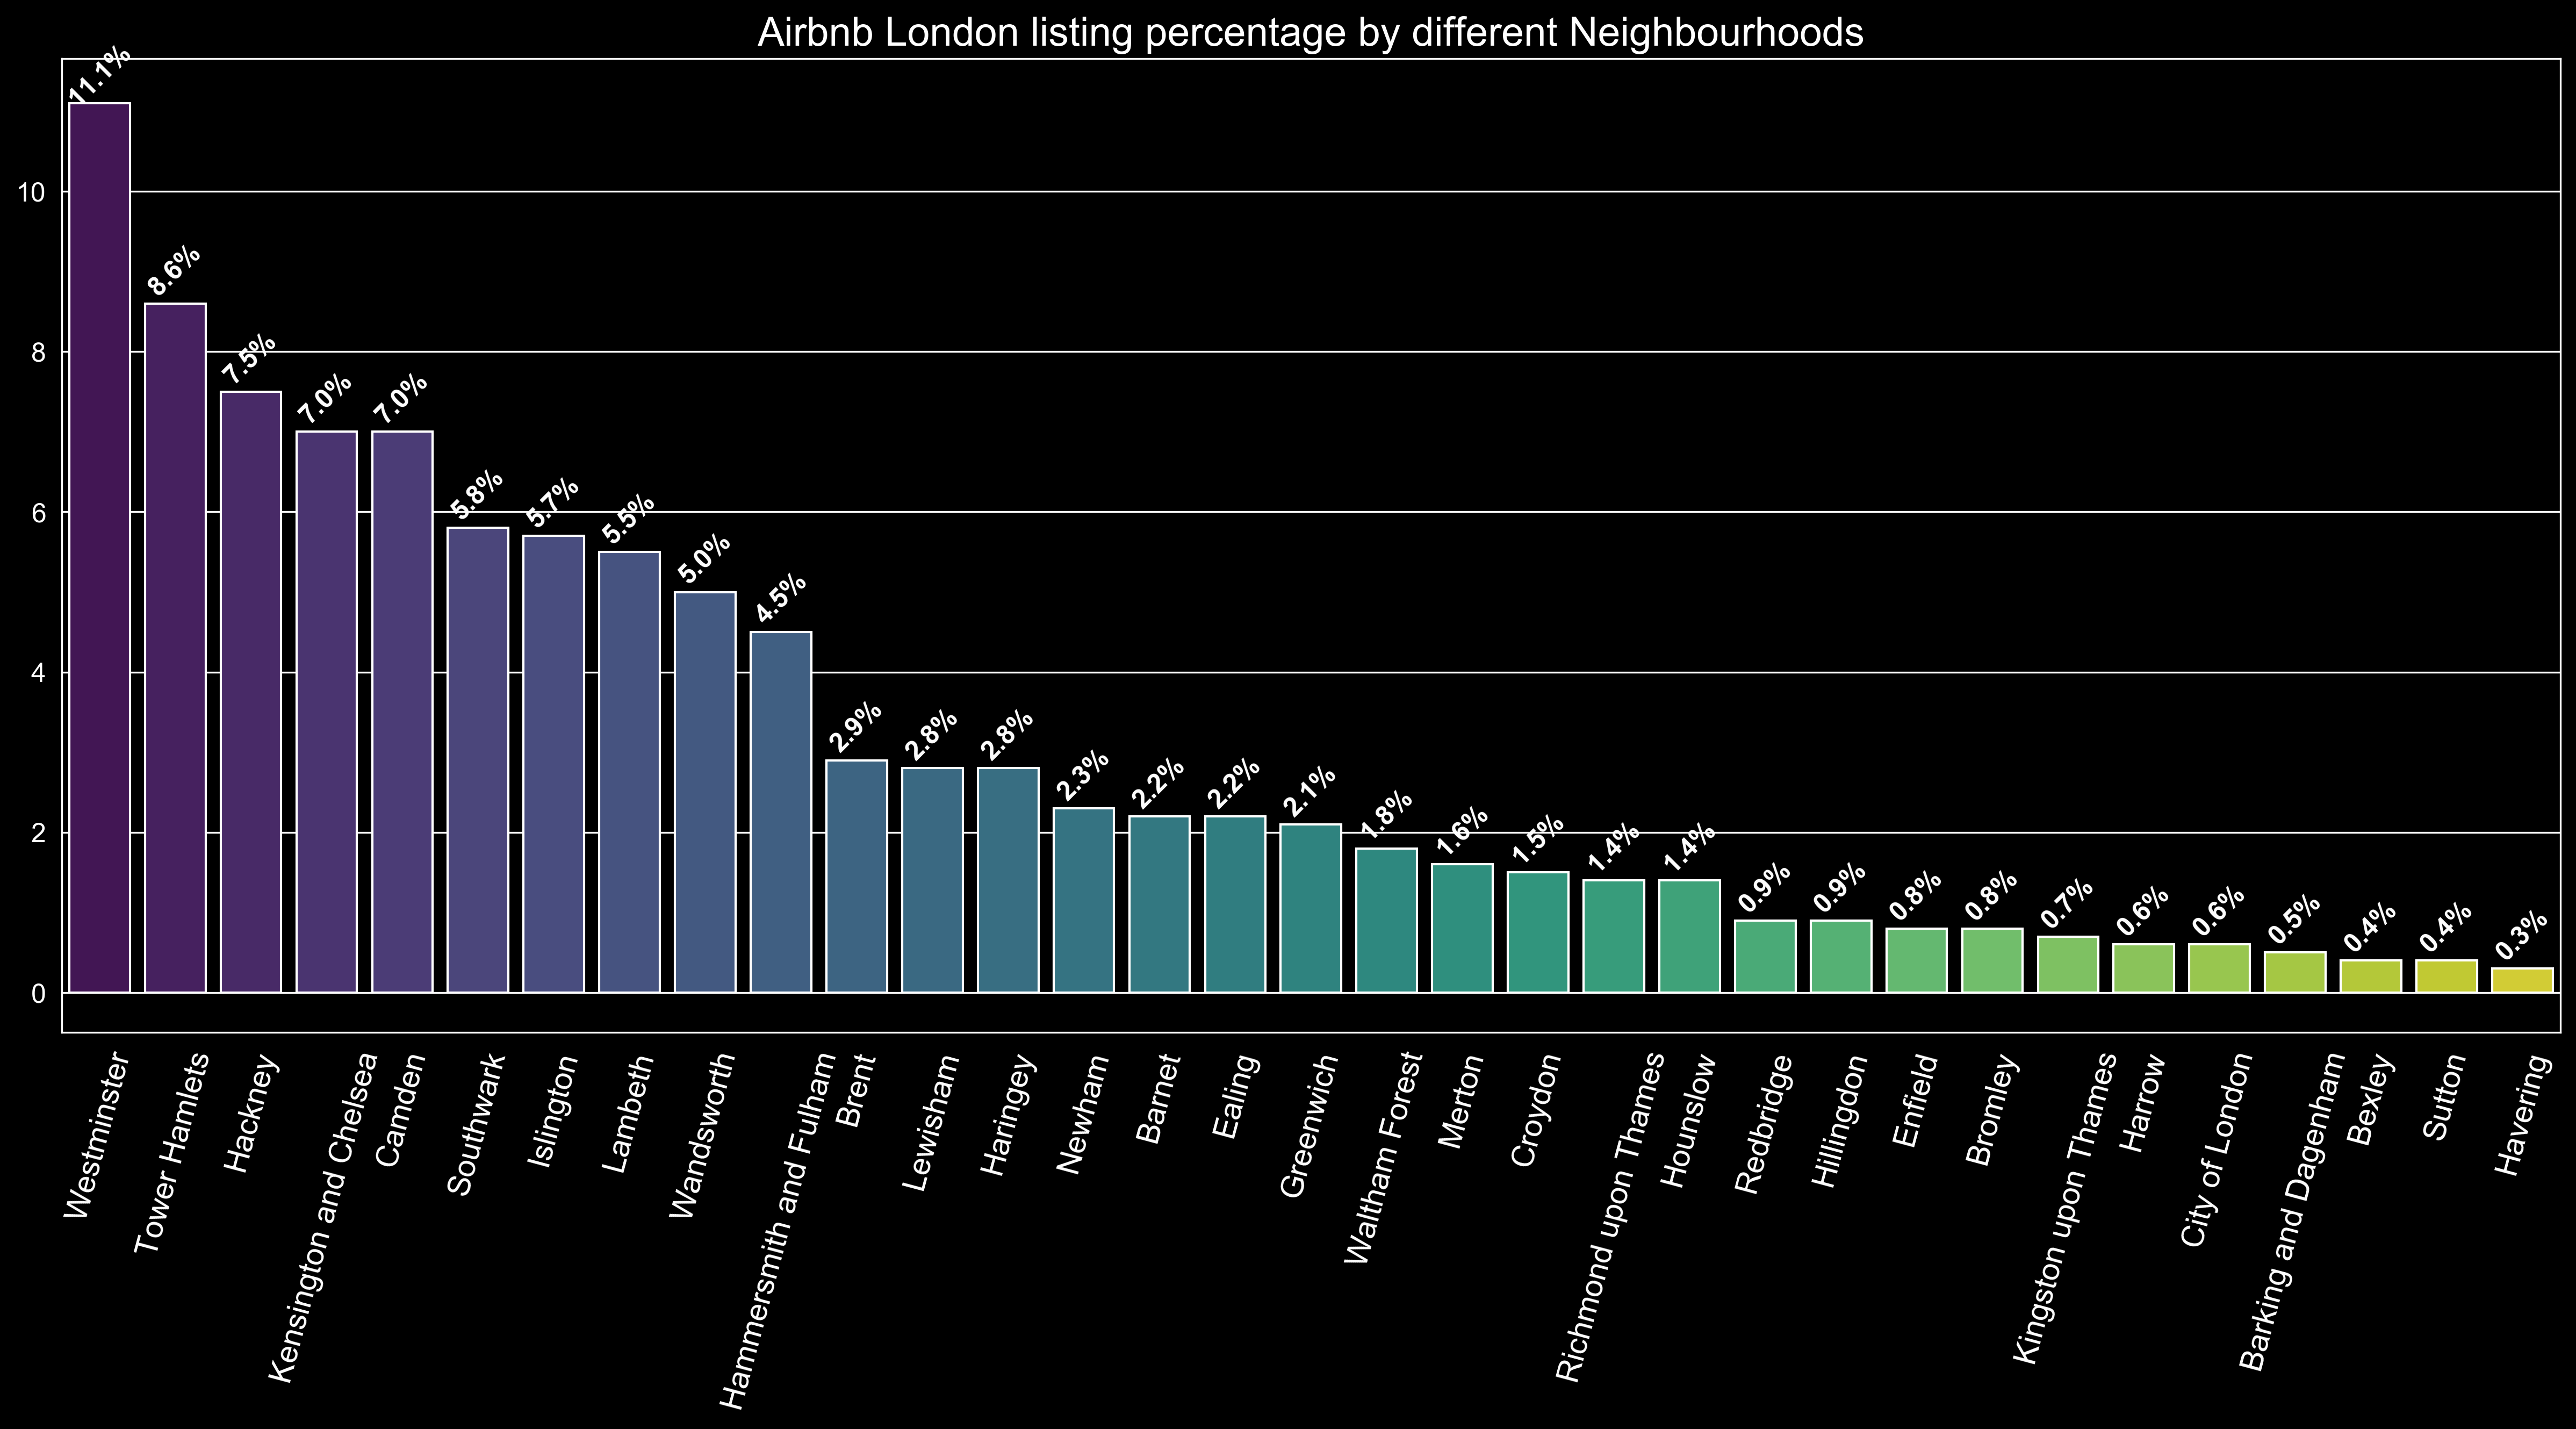

In [58]:
plt.figure(figsize=(20, 8), dpi=300 )

x =  (df_listings_num['neighbourhood_cleansed'].value_counts()/df_listings_num.shape[0]).index
y = round((df_listings_num['neighbourhood_cleansed'].value_counts()/df_listings_num.shape[0])*100, 1)
sns.barplot(x=x, y=y, order =y.sort_values(ascending=False).index, palette="viridis", alpha=1)
plt.title("Airbnb London listing percentage by different Neighbourhoods",fontsize=18)
plt.ylabel("")
plt.xticks(rotation = 75, fontsize = 14);
plt.yticks(fontsize = 12);
plt.ylim(-0.5,)
z = round((df_listings_num['neighbourhood_cleansed'].value_counts()/df_listings_num.shape[0])*100, 1)

for i in range(z.shape[0]):
    count = y[i]
    plt.text(i, count+0.8, str(count)+"%", ha = 'center', va ='top', fontsize = 12, rotation = 45, color = 'white', weight='bold')


plt.show()

In [59]:
df_neigh=pd.DataFrame()
df_neigh['count']=df_listings_num.neighbourhood_cleansed.value_counts()
df_neigh['Percentage']=round(df_listings_num.neighbourhood_cleansed.value_counts()/df_listings_num.shape[0]*100,2)
print('Total no of neighbourhoods in the listing dataset are: ', df_neigh['count'].count())
df_neigh.sort_values(by='count',ascending=False)

Total no of neighbourhoods in the listing dataset are:  33


,count,Percentage
Westminster,8151,11.11
Tower Hamlets,6314,8.61
Hackney,5478,7.47
Kensington and Chelsea,5156,7.03
Camden,5110,6.97
Southwark,4238,5.78
Islington,4214,5.74
Lambeth,4060,5.53
Wandsworth,3689,5.03
Hammersmith and Fulham,3310,4.51


# What are most and least expensive neighbourhoods?

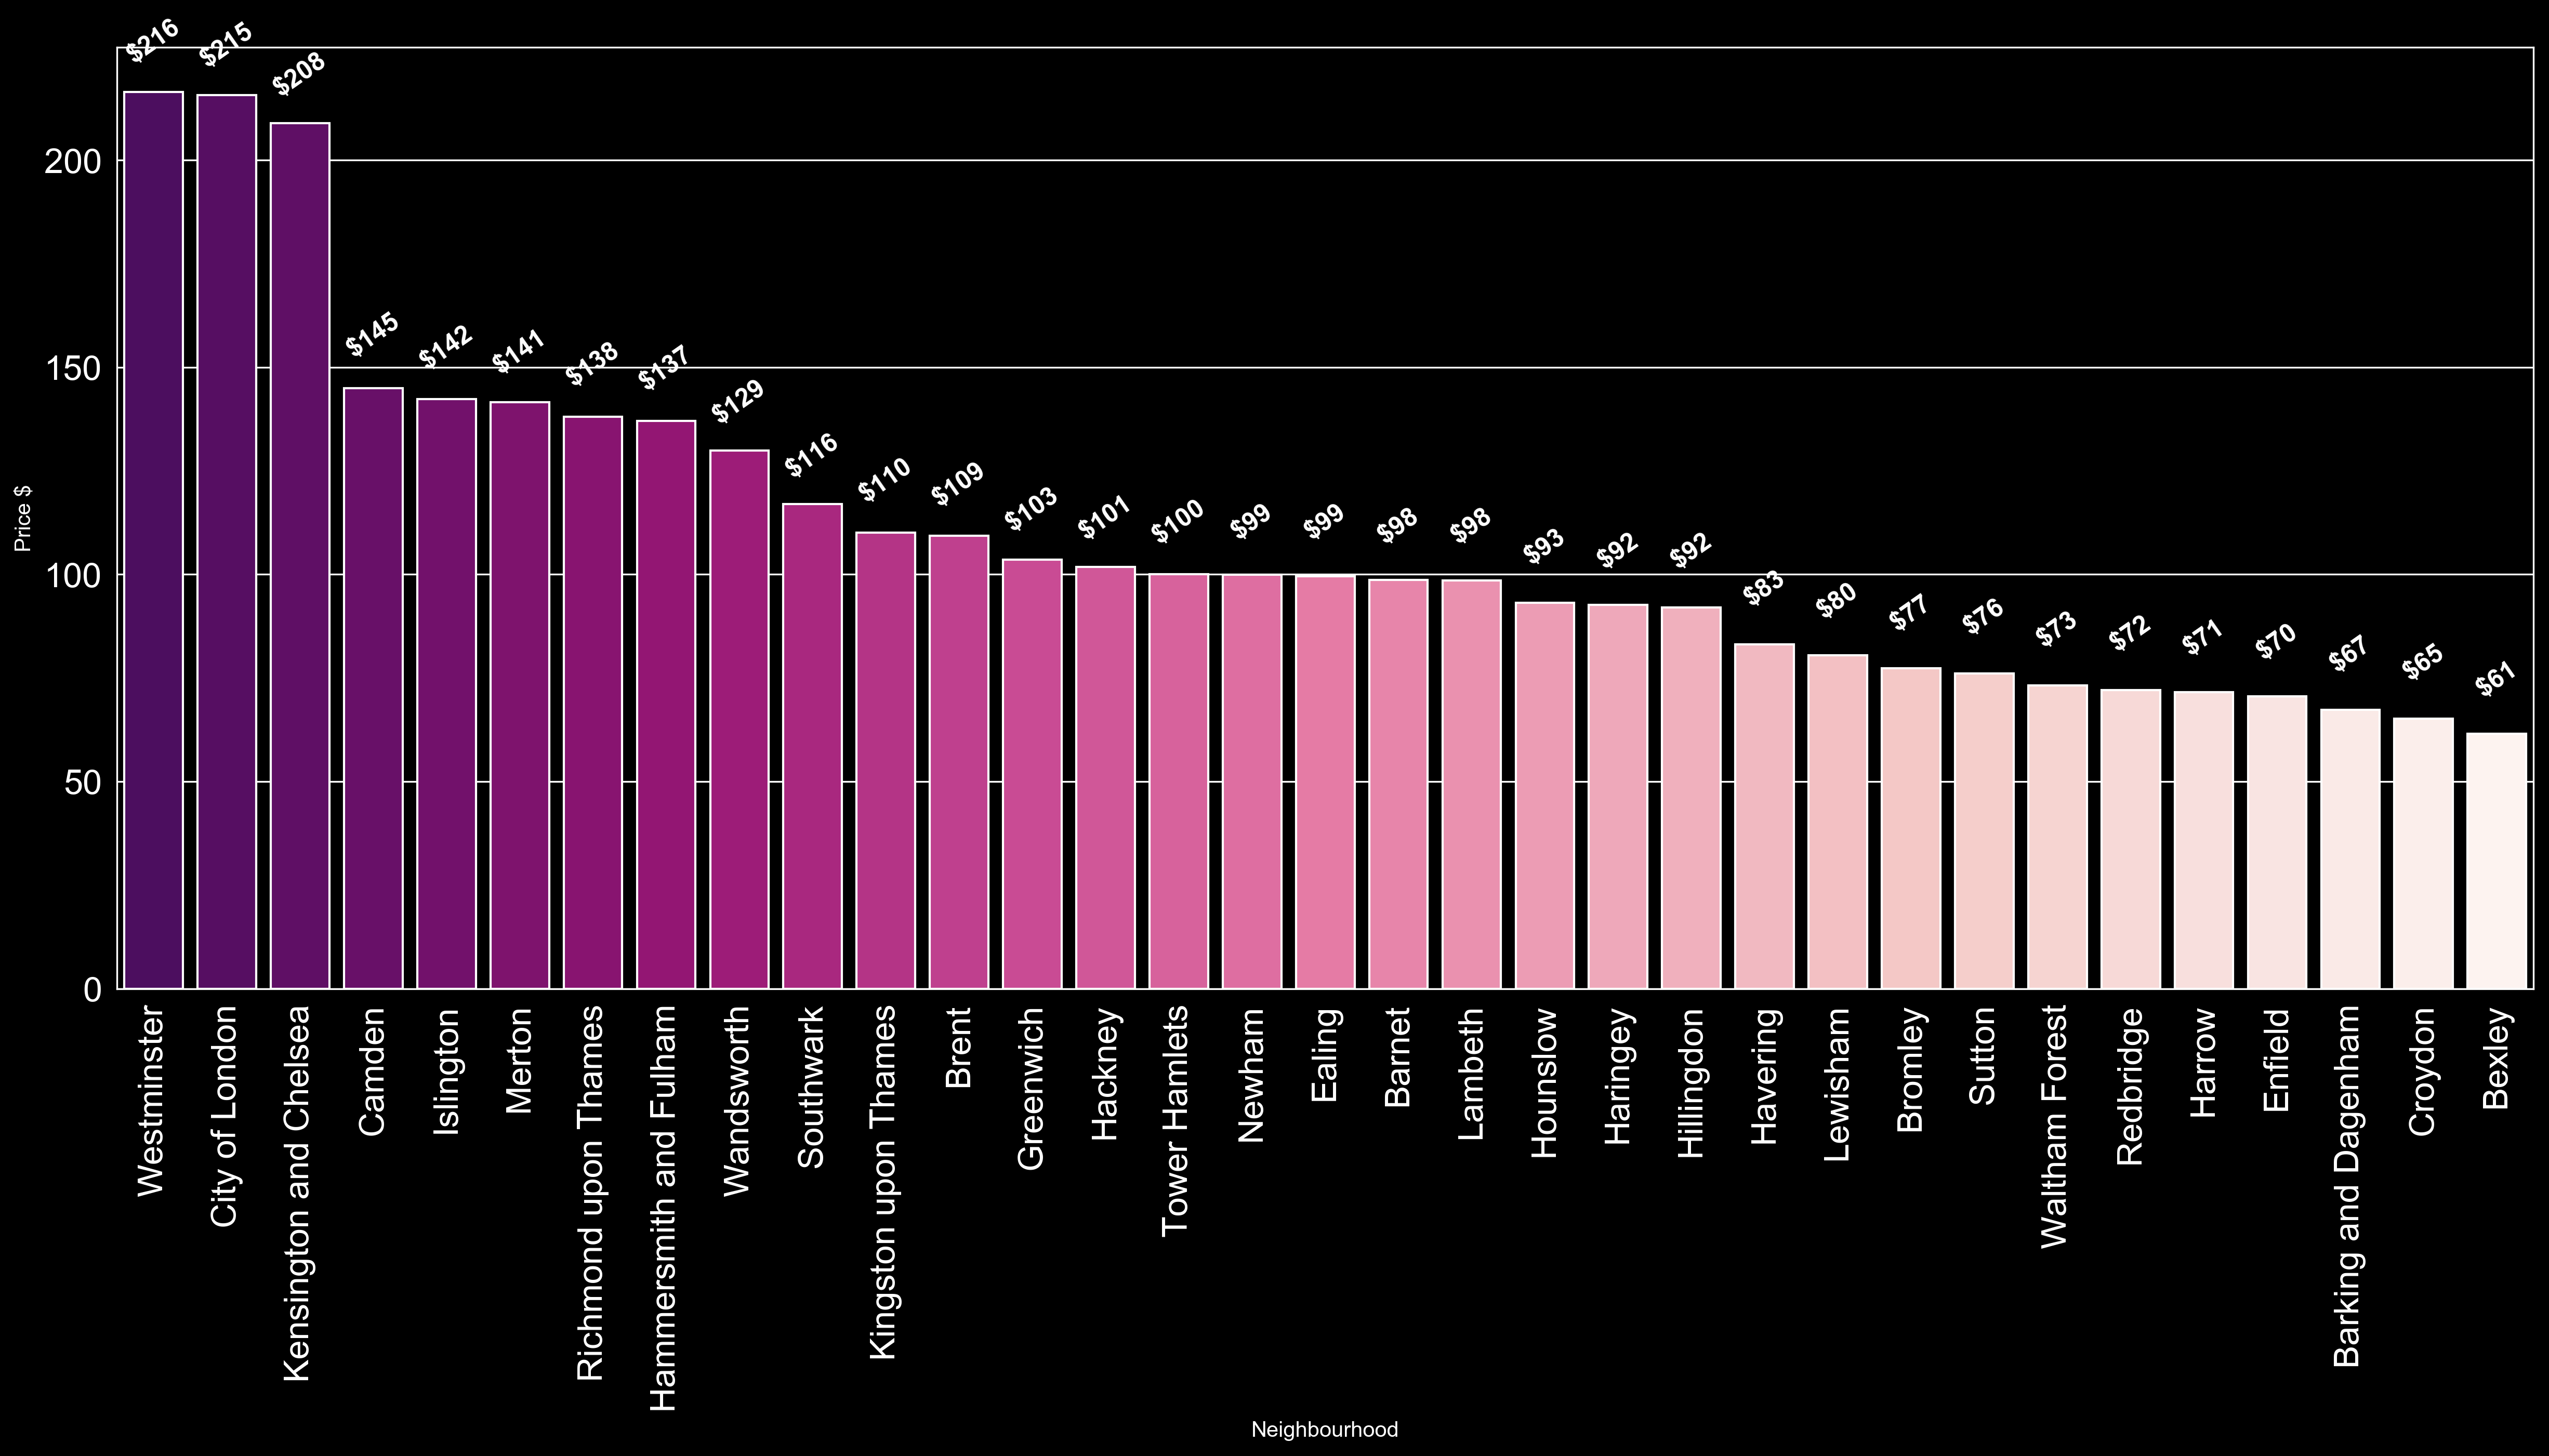

In [60]:
top_neighs = list(df_neigh.sort_values(by = 'count', ascending =False)[0:36].index.values)
plt.figure(figsize=(20, 8), dpi=300 )
x =  (df_listing.loc[df_listings_num['neighbourhood_cleansed'].isin(top_neighs)].groupby('neighbourhood_cleansed')['price'].mean()).index
y = (df_listing.loc[df_listings_num['neighbourhood_cleansed'].isin(top_neighs)].groupby('neighbourhood_cleansed')['price'].mean())
sns.barplot(x=x, y=y, order =y.sort_values(ascending=False).index, palette='RdPu_r', alpha=1) 

plt.xlabel('Neighbourhood')
plt.ylabel('Price $')
# plt.ylabel("")
# plt.xlabel("")
plt.xticks(rotation = 90, fontsize = 16);
plt.yticks(fontsize = 16);


types_count = round(df_listing.loc[df_listings_num['neighbourhood_cleansed'].isin(top_neighs)].groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending = False).astype('int'),0)
z = df_listing.loc[df_listings_num['neighbourhood_cleansed'].isin(top_neighs)].groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending = False)

for i in range(z.shape[0]):
    count = types_count[i]
    plt.text(i, count+19, "$"+str(count), ha = 'center', va ='top', fontsize = 12, rotation = 35, color = 'white', weight='bold')
plt.show()

In [61]:
round(df_listing.loc[df_listings_num['neighbourhood_cleansed'].isin(top_neighs)].groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending = False),0)

neighbourhood_cleansed
Westminster               216.0
City of London            216.0
Kensington and Chelsea    209.0
Camden                    145.0
Islington                 142.0
Merton                    142.0
Richmond upon Thames      138.0
Hammersmith and Fulham    137.0
Wandsworth                130.0
Southwark                 117.0
Kingston upon Thames      110.0
Brent                     109.0
Greenwich                 104.0
Hackney                   102.0
Tower Hamlets             100.0
Newham                    100.0
Ealing                    100.0
Barnet                     99.0
Lambeth                    99.0
Hounslow                   93.0
Haringey                   93.0
Hillingdon                 92.0
Havering                   83.0
Lewisham                   81.0
Bromley                    77.0
Sutton                     76.0
Waltham Forest             73.0
Redbridge                  72.0
Harrow                     72.0
Enfield                    71.0
Barking and Dagen

# What is the monthly price fluctuation and which part of the year experiences a growth in prices?

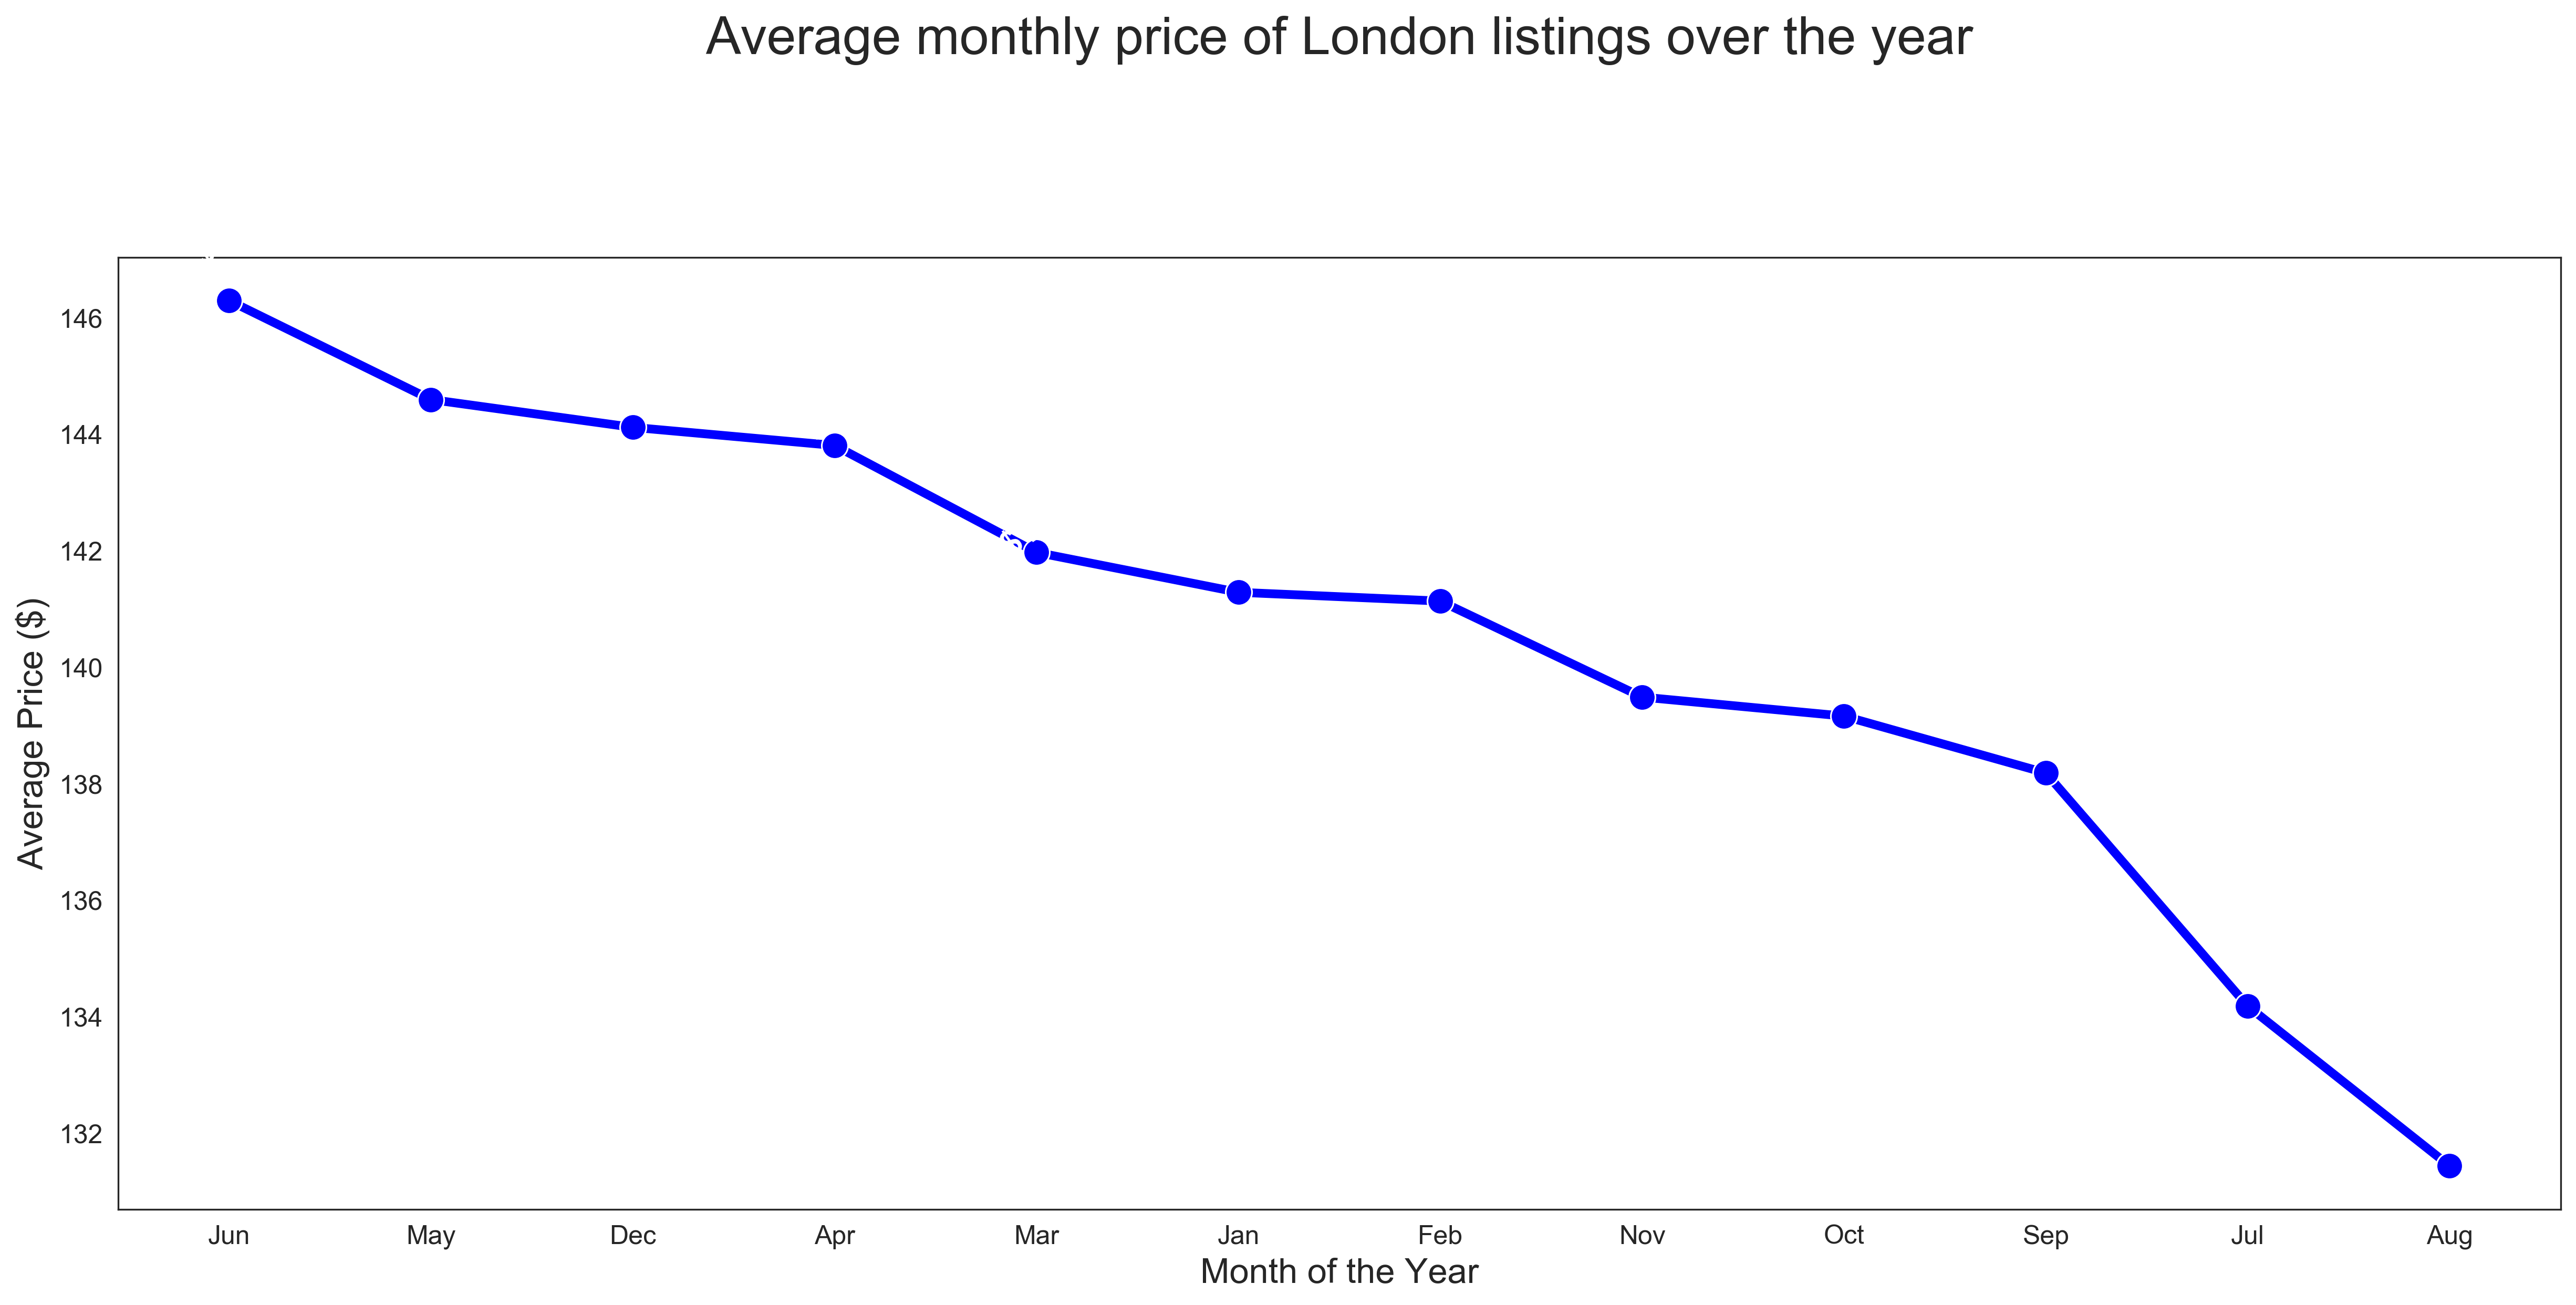

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8), dpi=300 )
base=sns.color_palette()[2]
levels = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_price_per_month=df_cal.groupby('month').mean()[['price']].sort_values(by='price',ascending=False)
# avg_price_per_month.index=pd.(avg_price_per_month.index,ordered=True,categories=levels)
avg_price_per_month

sns.lineplot(x='month',y='price',data=avg_price_per_month,linewidth =4, markers=True, marker = "o", markersize =12, color = "blue")

plt.title("Average monthly price of London listings over the year",fontsize=24,y=1.2)
plt.xlabel('Month of the Year', fontsize = 16)
plt.ylabel('Average Price ($)', fontsize = 16);
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
for i in (levels):
    count = int(avg_price_per_month.loc[i].values)
    plt.text(i, count+2, "$" + str(count), ha = 'center', va ='top', fontsize = 16, rotation = 35, color = 'white', weight='bold')
plt.show()



# Which property types or room types are listed more frequently

In [76]:
df_roomtype = pd.DataFrame()
df_roomtype['Room_Type_count'] = df_listing.room_type.value_counts()
df_roomtype['Room_Type_percentage'] = round(df_listing.room_type.value_counts()/df_listing.shape[0]*100, 2)
df_roomtype

,Room_Type_count,Room_Type_percentage
Entire home/apt,39985,54.50
Private room,32364,44.11
Shared room,555,0.76
Hotel room,460,0.63


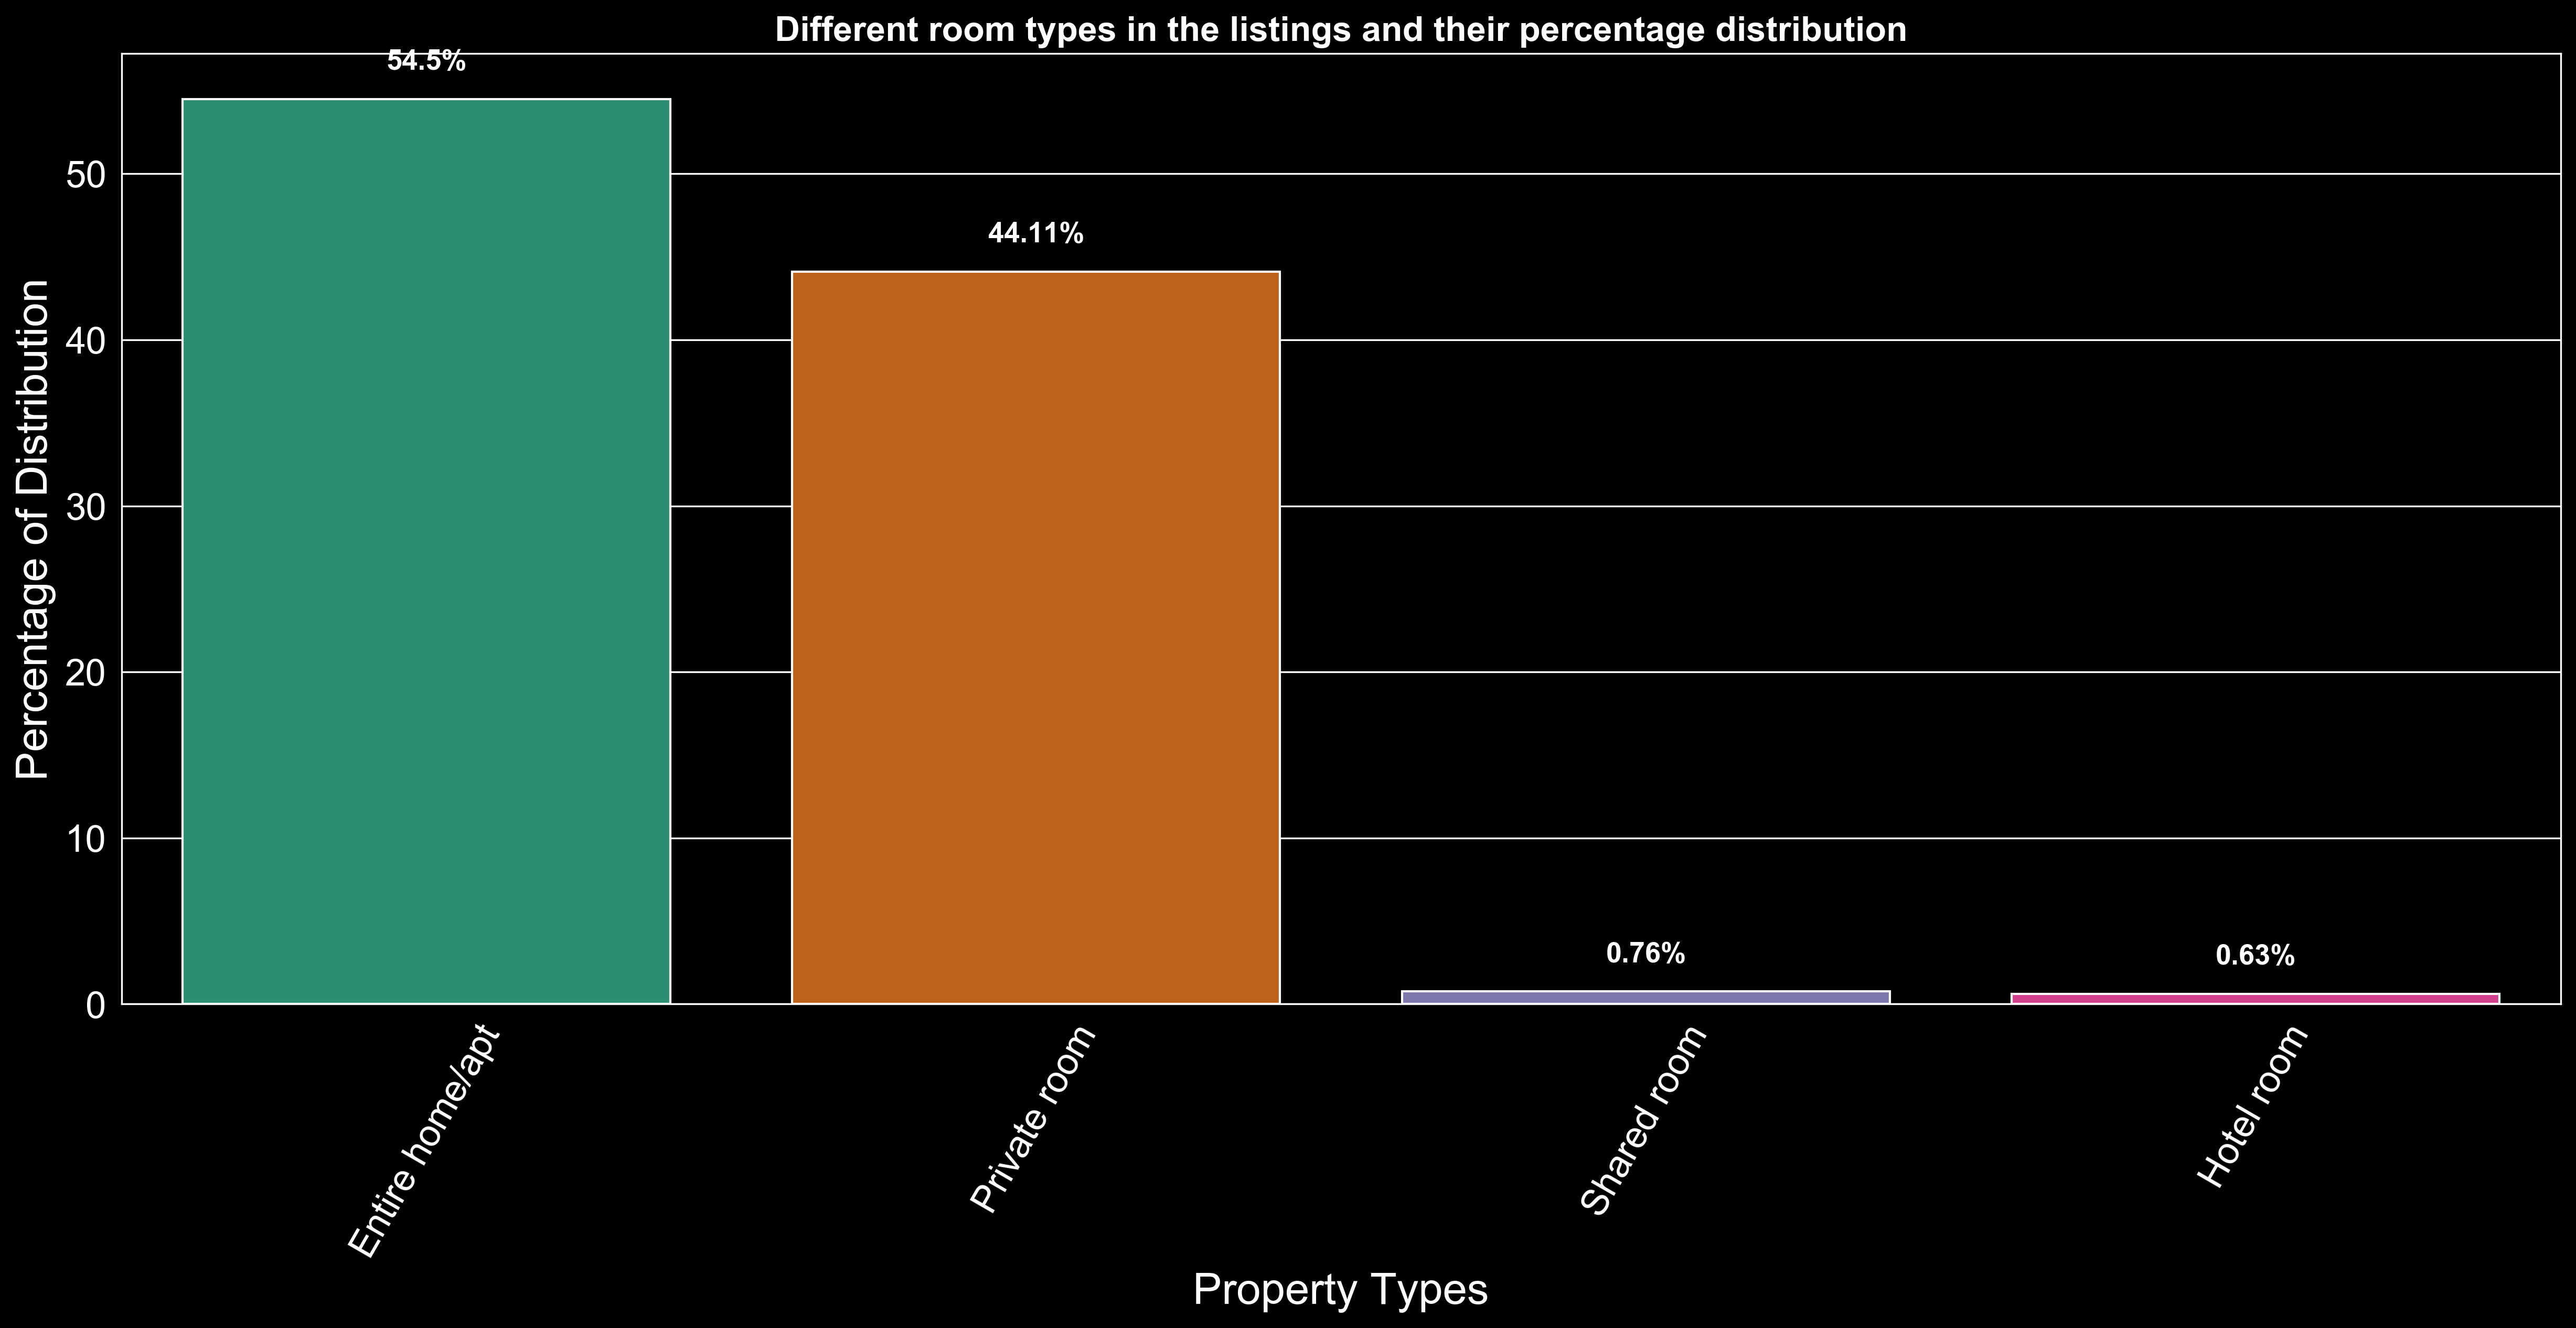

In [77]:
plt.figure(figsize=(20, 8), dpi=300 )
x=df_roomtype.index
y=df_roomtype.Room_Type_percentage
sns.barplot(x=x,y=y,palette='Dark2',alpha=1)
plt.title("Different room types in the listings and their percentage distribution", fontsize =16,  weight='bold')
plt.xlabel('Property Types', fontsize =20)
plt.ylabel('Percentage of Distribution', fontsize =20)
plt.xticks(rotation = 60, fontsize =17)
plt.yticks(fontsize =17)
for i in range(y.shape[0]):
    count = y[i]
    plt.text(i, count+3, str(count)+"%", ha = 'center', va ='top', fontsize =13,  weight='bold') 
plt.show()

# Features influencing property prices

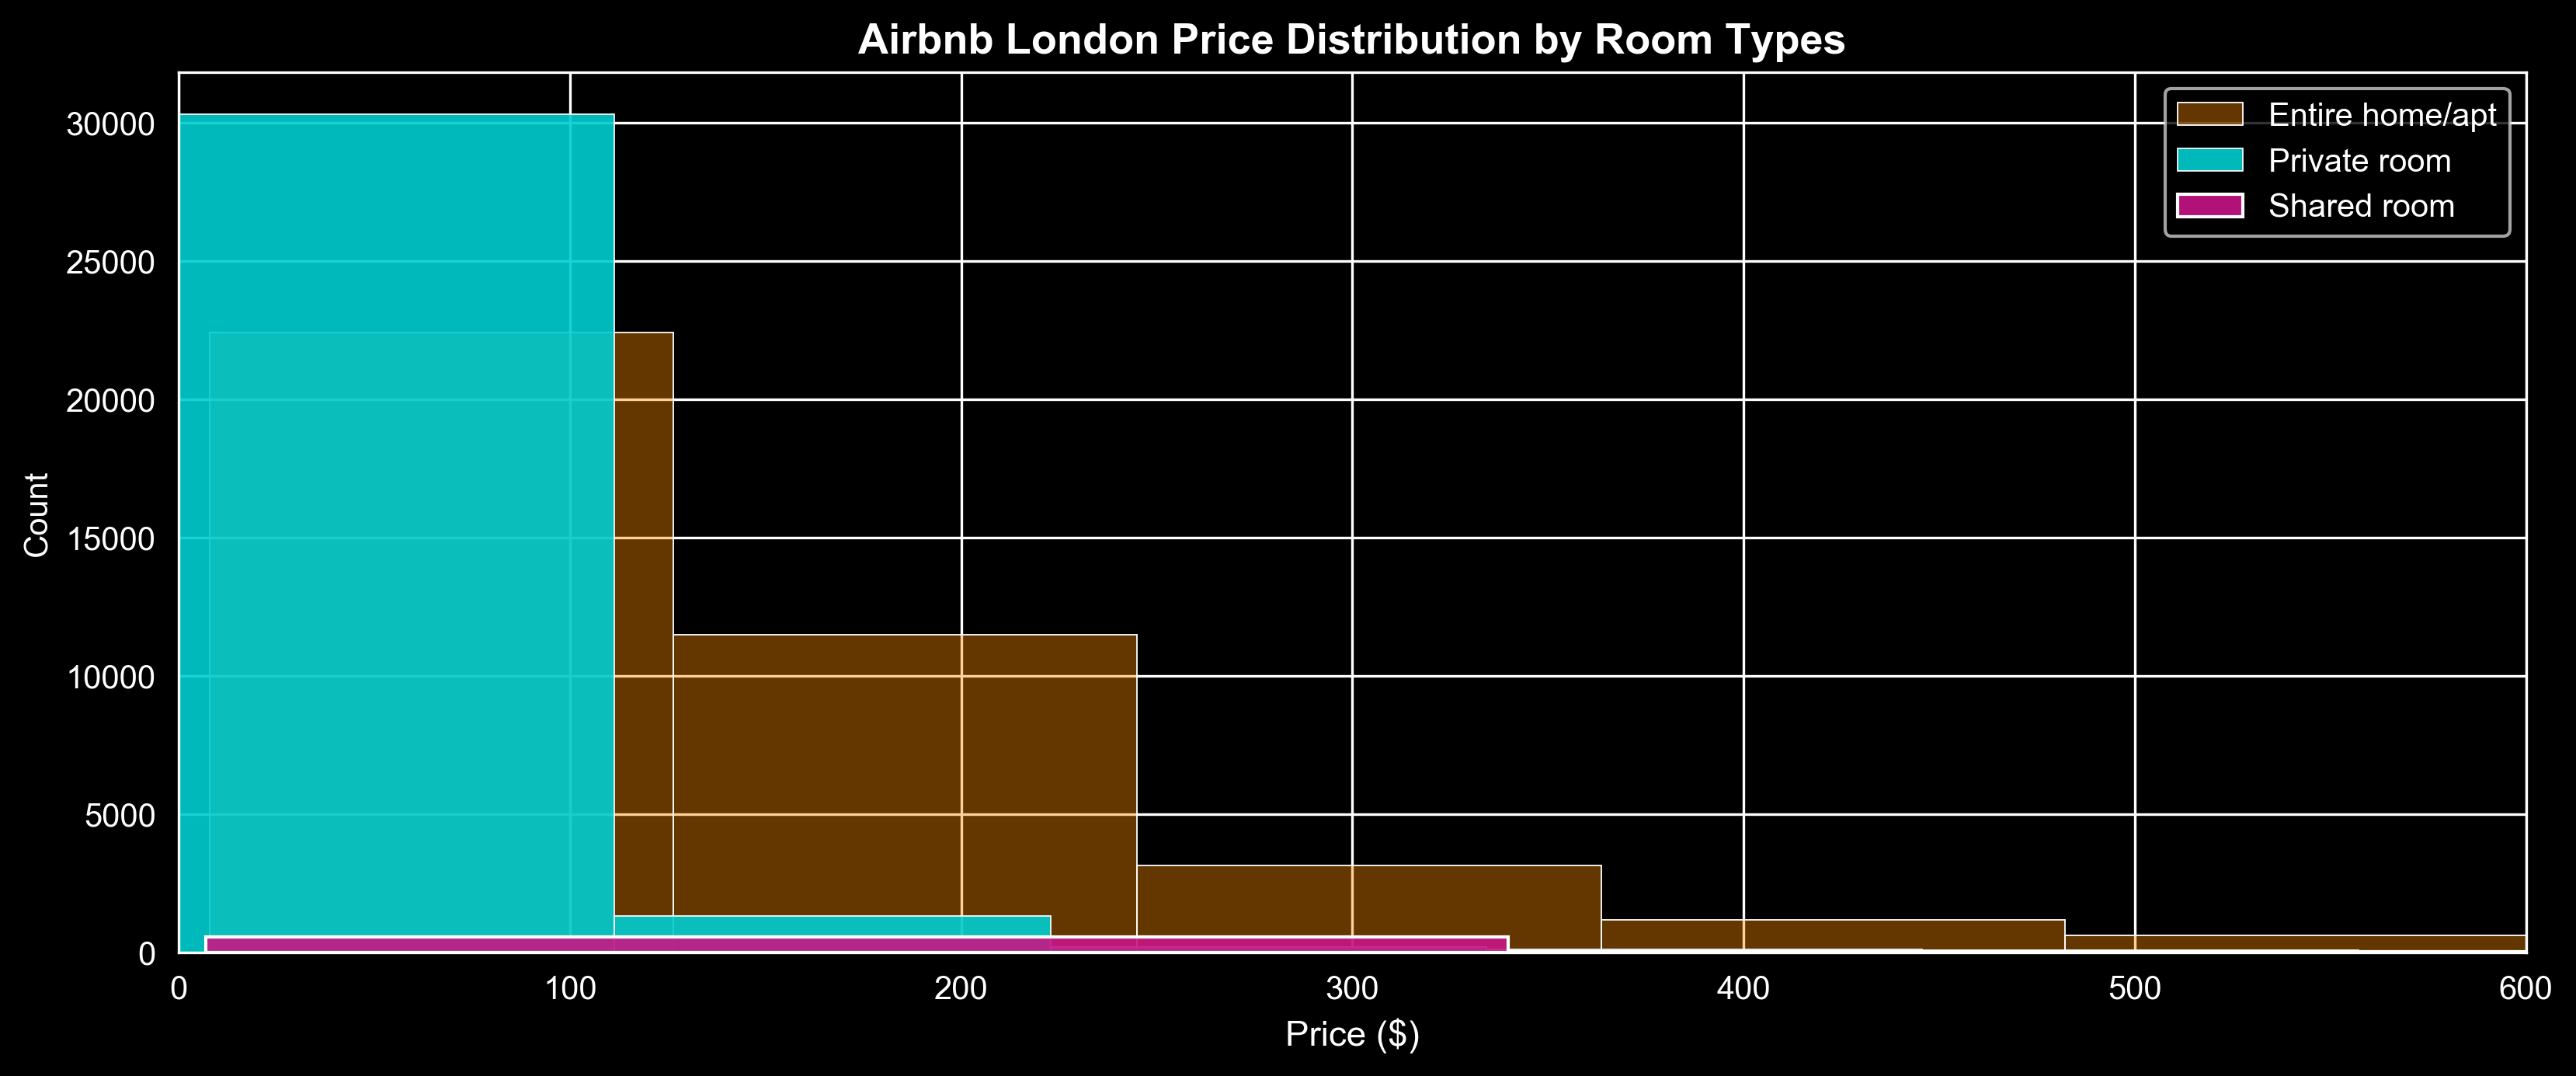

In [78]:
plt.figure(figsize=(13, 5), dpi=300)
#Visualize and understand the distriution of pricing among the each room type.
sns.histplot(df_listings_num[df_listings_num.room_type == 'Entire home/apt']['price'], kde=False, label='Entire home/apt', color = 'darkorange', alpha = 0.4, bins=150)
sns.histplot(df_listings_num[df_listings_num.room_type == 'Private room']['price'],kde=False, label='Private room', color = 'darkturquoise', alpha = 0.9,  bins=100)
sns.histplot(df_listings_num[df_listings_num.room_type == 'Shared room']['price'], kde=False, label='Shared room', color = "mediumvioletred", alpha = 0.9,  bins=15)
plt.xlim(0, 600)
plt.title('Airbnb London Price Distribution by Room Types', fontsize = 13, weight = 'bold')
plt.xlabel('Price ($)', fontsize = 11)
plt.legend();


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text yticklabel objects>)

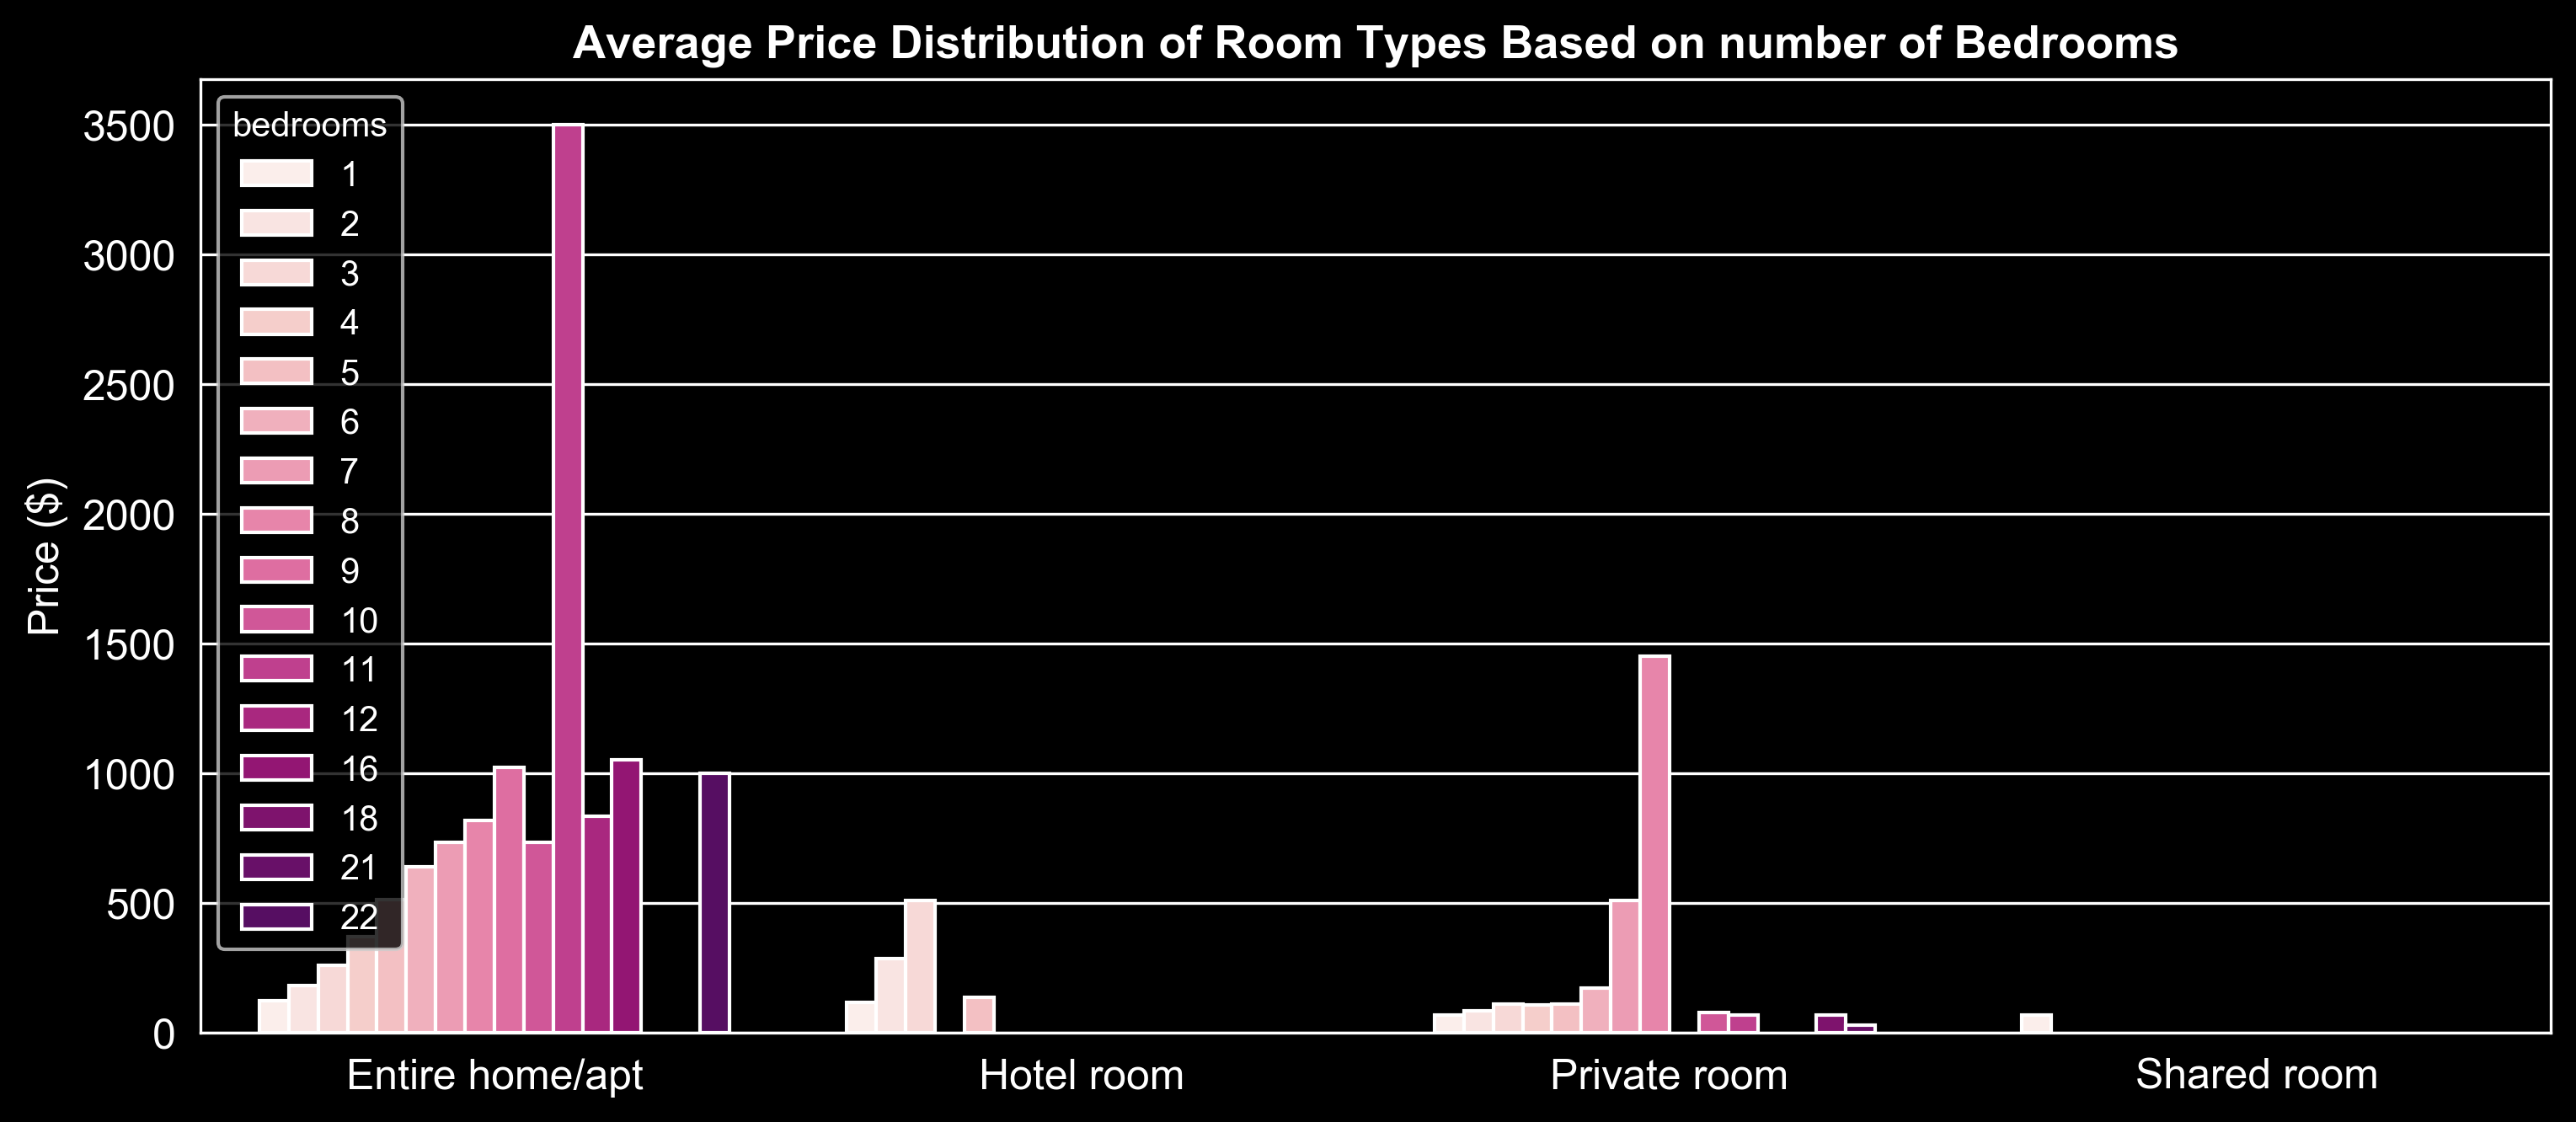

In [79]:
plt.figure(figsize=(12, 5), dpi=300)
df_bedroom = df_listings_num.groupby(['room_type', 'bedrooms'], as_index = False).mean()
sns.barplot(x="room_type", y="price", hue= 'bedrooms', data= df_bedroom, palette= 'RdPu')
plt.title('Average Price Distribution of Room Types Based on number of Bedrooms', fontsize = 13, weight = 'bold')
plt.xlabel("")
plt.ylabel('Price ($)', fontsize =12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [80]:
df_listings_dummies.isnull().sum()
df_listings_dummies.dropna(axis=0,how='any')

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,property_type_Shared room in villa,property_type_Stanza privata in appartamento,property_type_Tent,property_type_Tiny house,property_type_Yurt,property_type_주택의 개인실,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,0.0,0.0,51.460950,-0.117580,4,1,3,99.0,2,1125,...,0,0,0,0,0,0,0,0,0,1
1,3.0,3.0,51.568610,-0.112700,2,1,0,65.0,1,29,...,0,0,0,0,0,0,0,0,1,0
2,1.0,1.0,51.487800,-0.168130,2,1,1,75.0,10,50,...,0,0,0,0,0,0,0,0,0,0
3,18.0,18.0,51.521950,-0.140940,6,3,3,307.0,4,365,...,0,0,0,0,0,0,0,1,0,0
5,3.0,3.0,51.574380,-0.210810,2,1,0,29.0,10,1120,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73004,0.0,0.0,51.510474,-0.131459,4,1,2,347.0,2,1125,...,0,0,0,0,0,0,0,0,0,0
73046,9.0,9.0,51.496560,-0.147910,6,2,3,163.0,1,1125,...,0,0,0,0,0,0,0,0,0,1
73101,3.0,3.0,51.519400,-0.029920,2,1,1,28.0,1,1125,...,0,0,0,0,0,0,0,0,0,1
73150,0.0,0.0,51.488437,-0.309326,4,1,2,120.0,1,365,...,0,0,0,0,0,0,0,1,0,0


In [81]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df_listings_dummies)

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,property_type_Shared room in villa,property_type_Stanza privata in appartamento,property_type_Tent,property_type_Tiny house,property_type_Yurt,property_type_주택의 개인실,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,0.0,0.0,51.460950,-0.117580,4.0,1.0,3.0,99.0,2.0,1125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,3.0,51.568610,-0.112700,2.0,1.0,0.0,65.0,1.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,51.487800,-0.168130,2.0,1.0,1.0,75.0,10.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.0,18.0,51.521950,-0.140940,6.0,3.0,3.0,307.0,4.0,365.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,3.0,3.0,51.574380,-0.210810,2.0,1.0,0.0,29.0,10.0,1120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73004,0.0,0.0,51.510474,-0.131459,4.0,1.0,2.0,347.0,2.0,1125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73046,9.0,9.0,51.496560,-0.147910,6.0,2.0,3.0,163.0,1.0,1125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73101,3.0,3.0,51.519400,-0.029920,2.0,1.0,1.0,28.0,1.0,1125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73150,0.0,0.0,51.488437,-0.309326,4.0,1.0,2.0,120.0,1.0,365.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [82]:
X=df_listings_dummies.drop(labels = ["price"], axis = 1)
y = df_listings_dummies.price

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=45)
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
linear_model_train_pred=linear_model.predict(X_train)
linear_model_test_pred=linear_model.predict(X_test)

In [83]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)    
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Predict the property prices using the RandomForestRegressor model
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

In [84]:
lm_train_score = r2_score(y_train, linear_model_train_pred)
lm_test_score = r2_score(y_test, linear_model_test_pred)

rf_train_score = r2_score(y_train, rf_train_pred)
rf_test_score = r2_score(y_test, rf_test_pred)

print("The R squared score on the Linear Regression training data is: {} and on the RandomForest Regressor training data is: {}.".format(lm_train_score, rf_train_score))
print("The R squared score on the Linear Regression test data is: {} and on the RandomForest Regressor test data is: {}.".format(lm_test_score, rf_test_score))

lm_mae = mean_absolute_error(y_test, linear_model_test_pred)
rf_mae = mean_absolute_error(y_test, rf_test_pred)

print("Mean Absolute Error on Linear Regression test data is: {} and Mean Absolute Error on RandomForest Regressor test data is: {}.".format(lm_mae, rf_mae))

The R squared score on the Linear Regression training data is: 0.09901226918858252 and on the RandomForest Regressor training data is: 0.9286649163124179.
The R squared score on the Linear Regression test data is: 0.06149446684345927 and on the RandomForest Regressor test data is: 0.26560157220971714.
Mean Absolute Error on Linear Regression test data is: 56.569027678826224 and Mean Absolute Error on RandomForest Regressor test data is: 45.028949442783365.


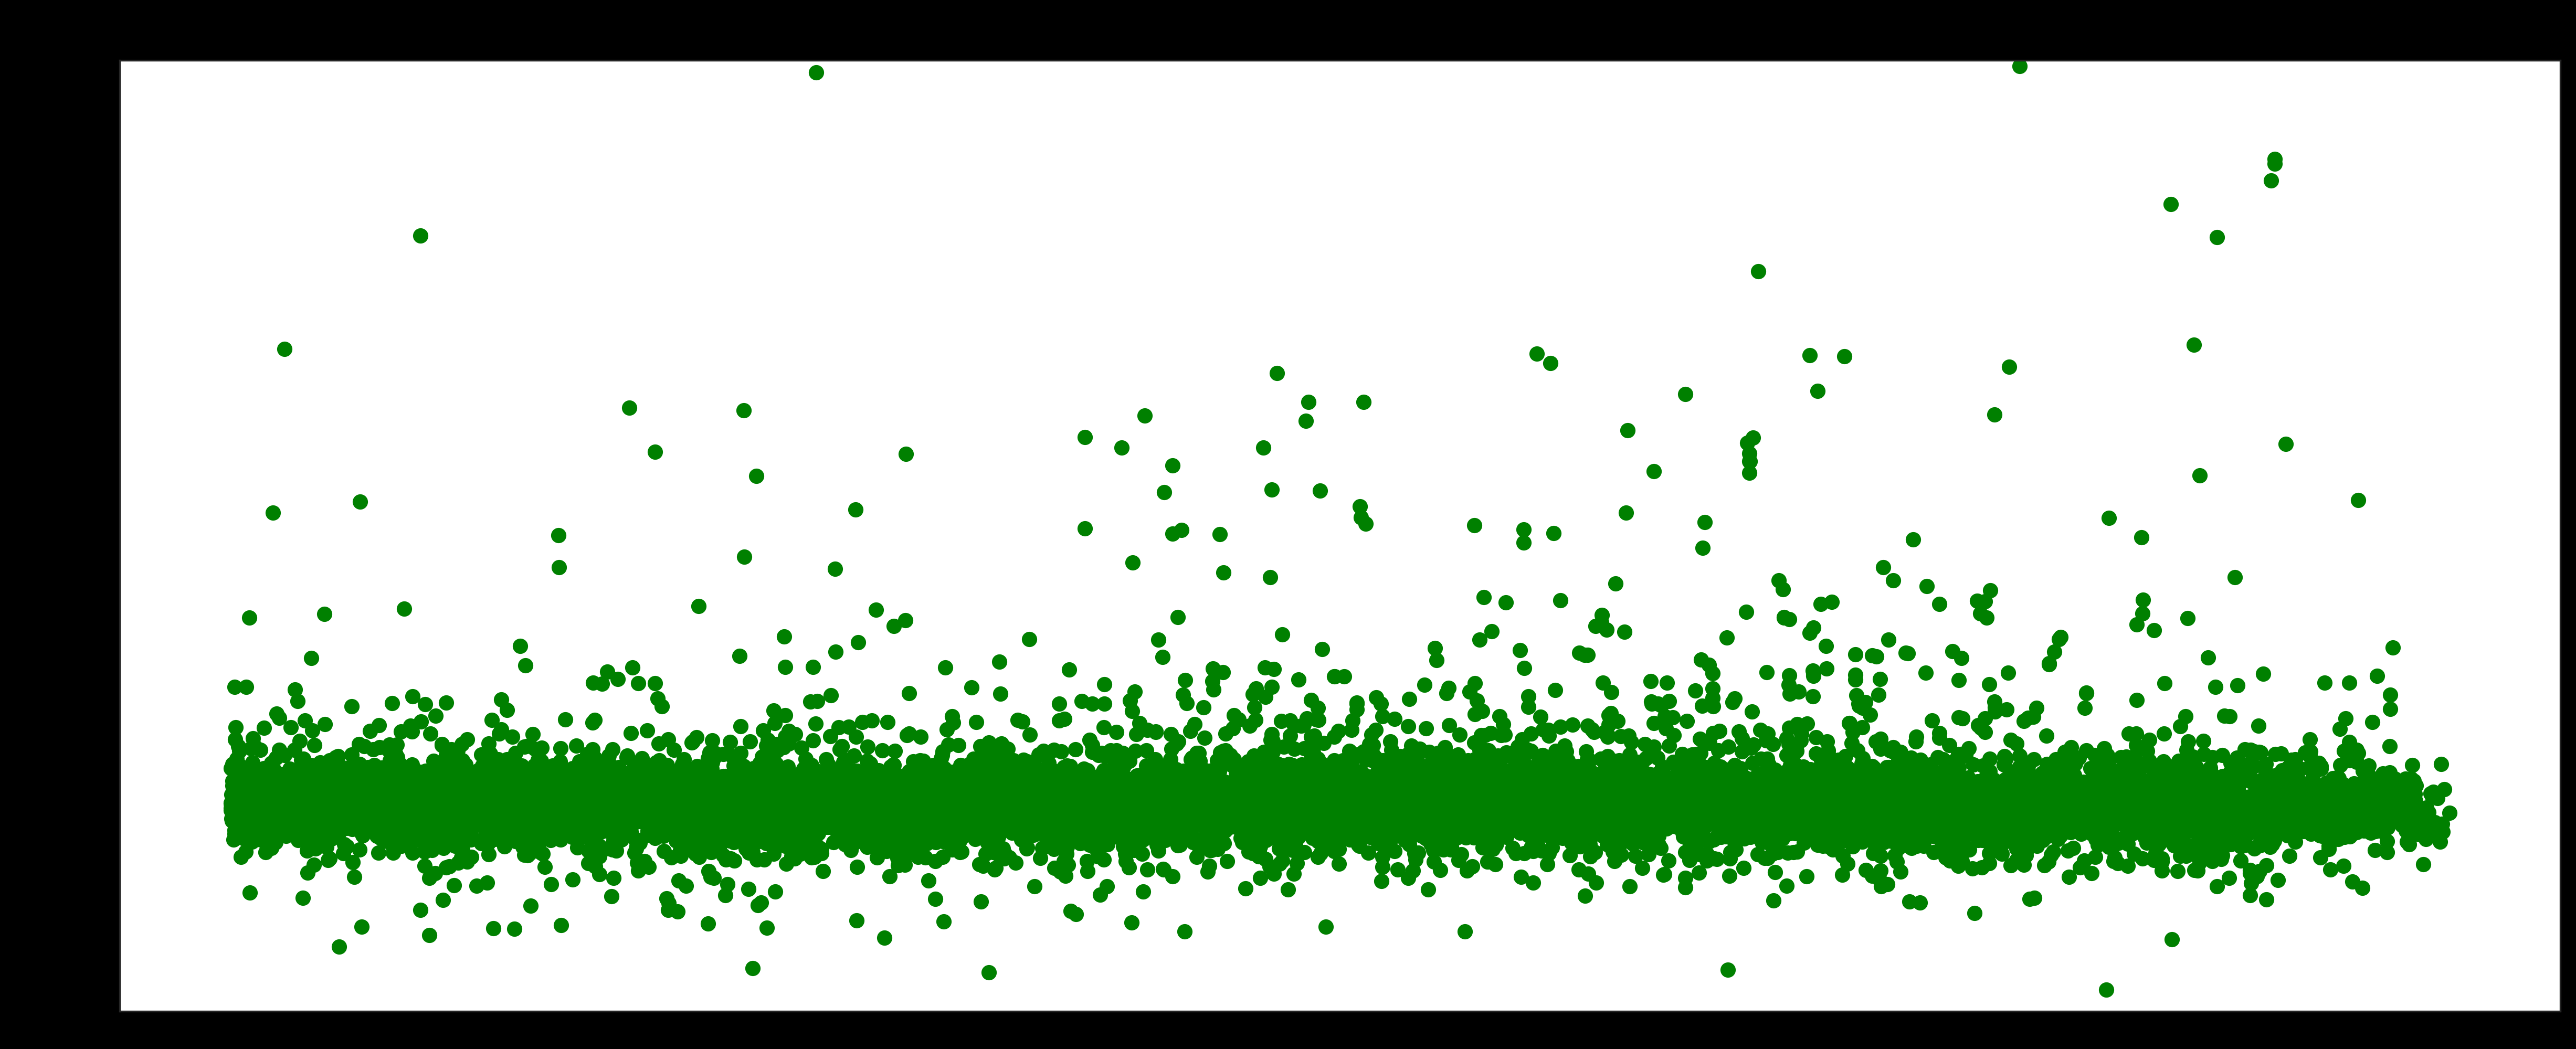

In [85]:
plt.figure(figsize=(20, 8), dpi=300 )
sns.set_style("white")
plt.title("Difference Between Actual and Predicted prices using LinearRegression model", fontsize = 20, weight = 'bold',color='black')
plt.plot(y_test - linear_model_test_pred, marker='o',linestyle='', color ='green')
plt.yticks(fontsize = 18,color='black')
plt.xticks([])
plt.ylim(-500, 1700);

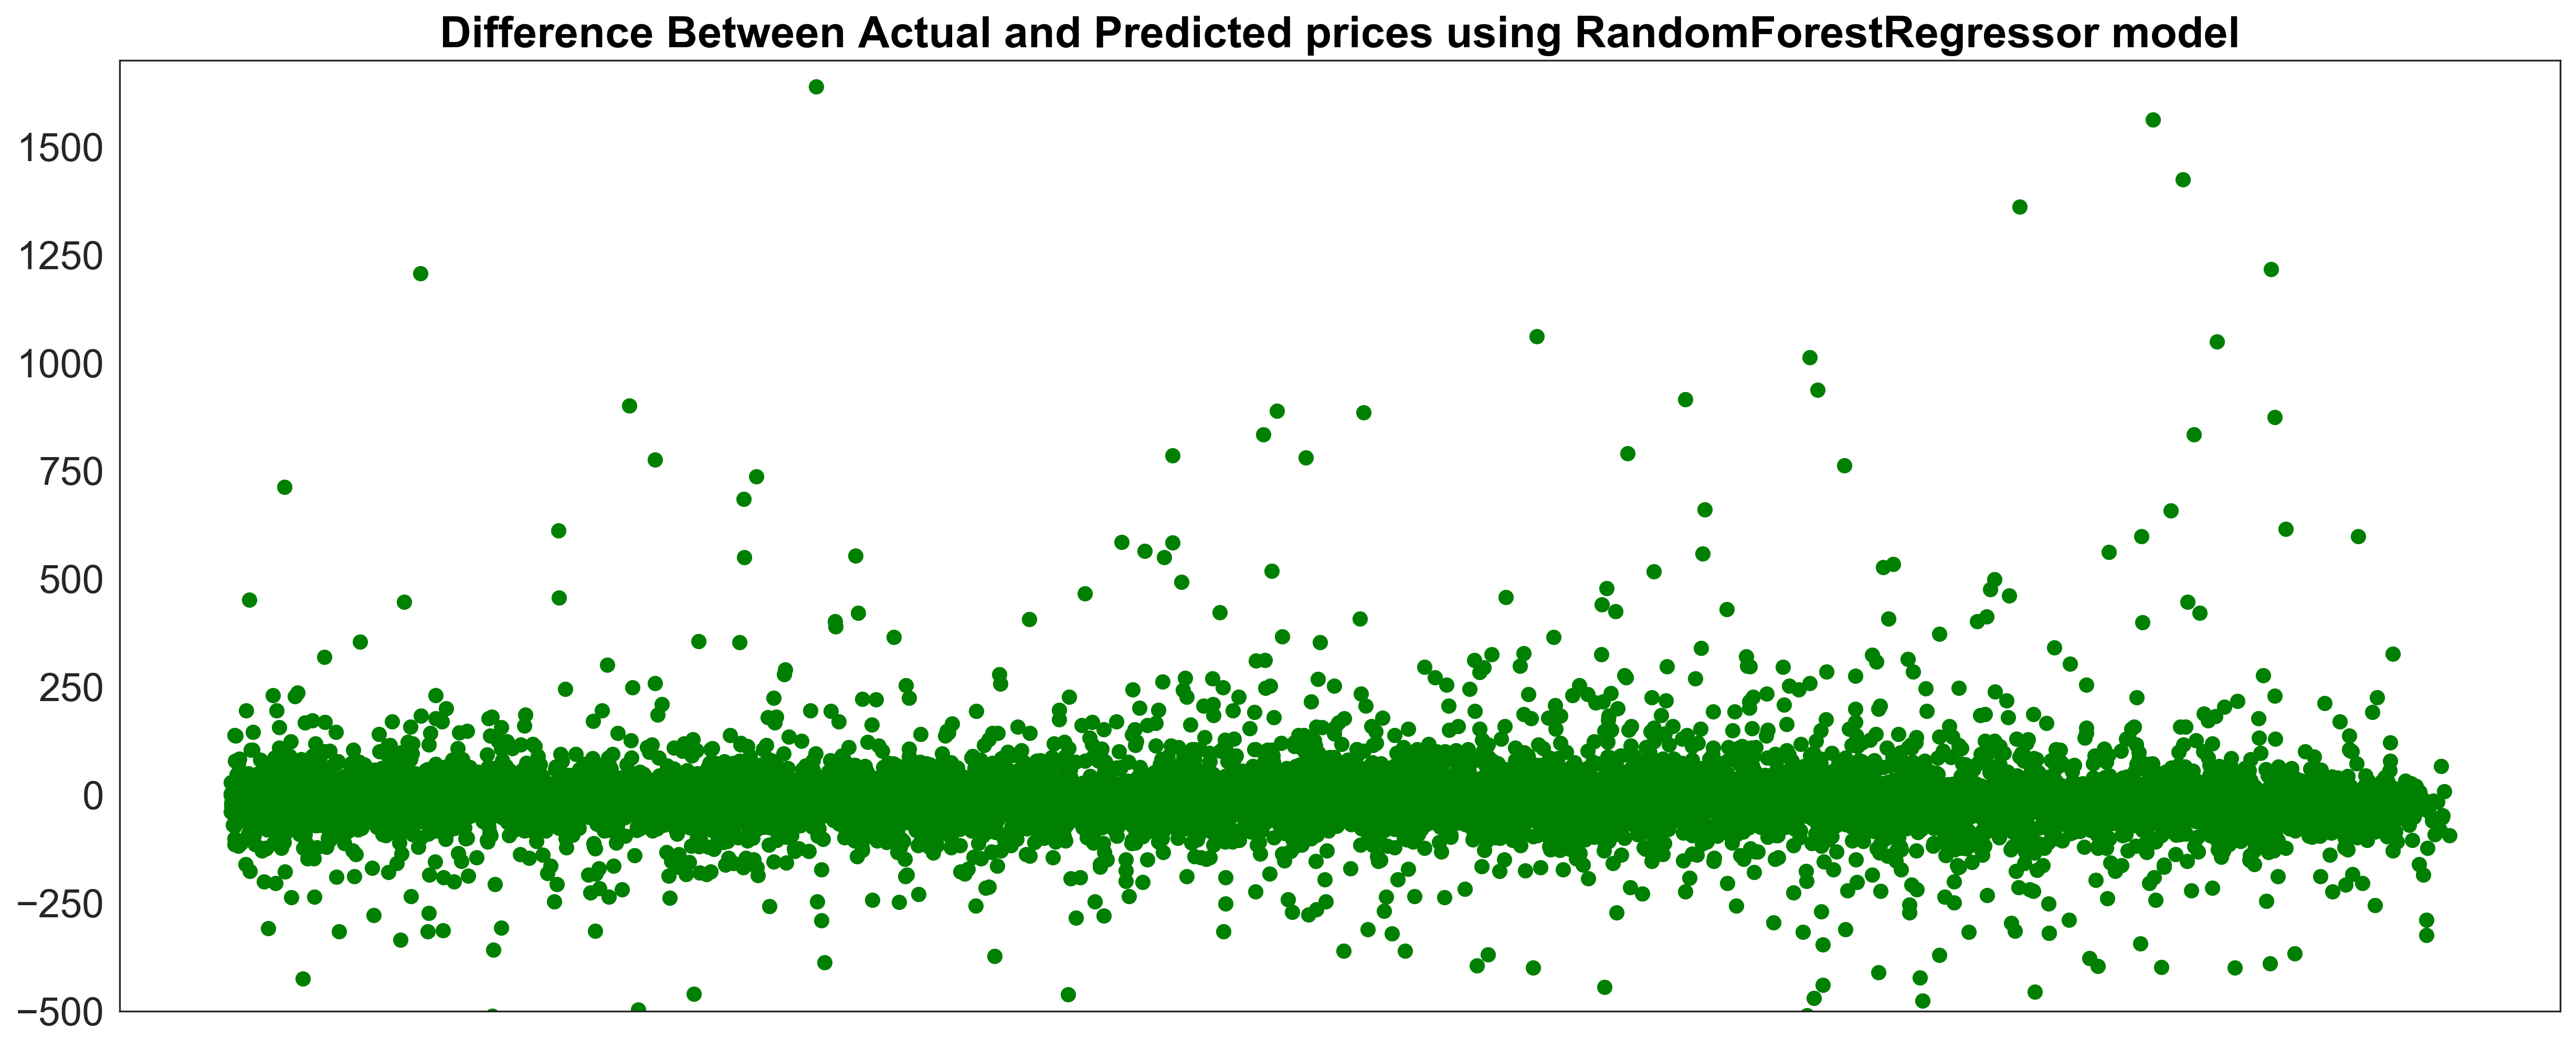

In [86]:
plt.figure(figsize=(20, 8), dpi=300 )
sns.set_style("white")
plt.plot(y_test - rf_test_pred, marker='o',linestyle='', color ='green')
#plt.ylabel('Actual and Pred Price Difference-RF Model');
plt.title('Difference Between Actual and Predicted prices using RandomForestRegressor model', fontsize = 20, weight = 'bold',color='black')
plt.yticks(fontsize = 18)
plt.xticks([])
plt.ylim(-500, 1700);

# Summary of Analysis to answer Business related queries

Q1. Which are the neighbourhoods with highest listings?

   There are above 30 neighbourhoods listed in the Airbnb listings London datase. The Westminster neighbourhood has highest listings with percentage at 11.1 of total listings. The second highest neighbourhood is Tower of Hamlets at 8.6%. The neighbourhoods of Hackney, Kensington and Chlesa and Camden are also in the top five.



Q2. What are the most and least epensive neighbourhoods?

The Westminster neighbourhood is the most expensive with listing price at 216 dollars and also listing concentration at 11.1%. The Croydon neighbourhood seems to be the least expensive one with listings at 61 dollars

Q3. How does price fluctuation occur and in which season are the prices normally higher?

The prices are relatively less volatile in London with the lisitings peak price in the month of June and a sharp decline in the months of July and August but then stabilizing again around the month of October



Q4. What type of rooms are listed the most?

Mostly entire apartments or flats are listed in London with percentage dstribution at about 54% while the listing of shared rooms is very rare